In [1]:
import numpy as np
import tensorflow as tf
import math
import cv2
import matplotlib.pyplot as plt


In [2]:
arr=np.array([[[0,0,0],[0,0,0]],[[0,0,0],[0,0,0]]])
arr=arr.flatten()
arr[3:6]=1

print(len(arr))

12


In [3]:
def label_oneshot(label):
    new_label=[]
    for i in range(len(label)):
        arr=np.zeros((label[i][:,:,0].shape[0]*label[i][:,:,0].shape[1],38),np.uint64)
        flat_label=label[i][:,:,0].flatten()
        for x in range(len(flat_label)):
            arr[x,flat_label[x]]=1
        arr=np.reshape(arr,(label[i][:,:,0].shape[0],label[i][:,:,0].shape[1],38))
        new_label.append(arr)
    return new_label
def img_resize(img):
    for i in range(len(img)):
        img[i]=cv2.resize(img[i], None, fx=0.4, fy=0.4, interpolation=cv2.INTER_AREA)
    return img

In [4]:
def l_oneshot(label):
    arr=np.zeros((label[:,:,0].shape[0]*label[:,:,0].shape[1],38),np.uint64)
    flat_label=label[:,:,0].flatten()
    for x in range(len(flat_label)):
        arr[x,flat_label[x]]=1
    arr=np.reshape(arr,(label[:,:,0].shape[0],label[:,:,0].shape[1],38))
    return arr
def im_resize(img):
    img=cv2.resize(img, None, fx=0.4, fy=0.4, interpolation=cv2.INTER_AREA)
    return img

In [5]:
#train_label=[cv2.imread('data/train_labels/img13labels-'+str(i+1).zfill(6)+'.png') for i in range(800)]#5285

In [6]:
train_label=[l_oneshot(im_resize(cv2.imread('data/train_labels/img13labels-'+str(i+1).zfill(6)+'.png'))) for i in range(500)]#5285

In [7]:
train_image=[im_resize(cv2.imread('data/train_images/img-'+str(i+1).zfill(6)+'.jpg')) for i in range(500)]#5285

In [ ]:
test_image=[im_resize(cv2.imread('data/test_images/img-'+str(i+1).zfill(6)+'.jpg')) for i in range(500)]#5050

In [ ]:
test_label=[l_oneshot(im_resize(cv2.imread('data/test_labels/img13labels-'+str(i+1).zfill(6)+'.png'))) for i in range(500)]#5050

In [8]:
#test_label=[cv2.imread('data/test_labels/img13labels-'+str(i+1).zfill(6)+'.png') for i in range(500)]#5050

In [64]:
# train_image=img_resize(train_image)
# train_label=img_resize(train_label)
# test_label=img_resize(test_label)
# test_image=img_resize(test_image)

In [ ]:
print(train_label[0].shape)
print(len(train_label[0][:,:,0].flatten()))

In [14]:
#new_test_label=label_oneshot(test_label)

In [ ]:
print(test_label[0].shape)

In [ ]:
#new_train_label=label_oneshot(train_label)

In [ ]:
print(len(train_label))

In [8]:
h=int(train_image[0].shape[0])
w=int(train_image[0].shape[1])
print(len(train_image))

500


In [9]:
print(train_image[0].shape)

(212, 292, 3)


In [58]:
#learning_rate=0.0001
training_epochs=500
batch_size = 12
tf.reset_default_graph()
x=tf.placeholder(tf.float32,[None,h,w,3])
y=tf.placeholder(tf.float32, [None,h,w,38])

In [59]:
print(x)


Tensor("Placeholder:0", shape=(?, 212, 292, 3), dtype=float32)


In [60]:
w1_1_1=tf.get_variable("w1_1_1", shape=[3,3,3,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w1_1_2=tf.get_variable("w1_1_2", shape=[6,6,3,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w1_2_1=tf.get_variable("w1_2_1", shape=[3,3,64,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w1_2_2=tf.get_variable("w1_2_2", shape=[6,6,64,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())

w2_1_1=tf.get_variable("w2_1_1", shape=[3,3,64,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w2_1_2=tf.get_variable("w2_1_2", shape=[6,6,64,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w2_2_1=tf.get_variable("w2_2_1", shape=[3,3,128,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w2_2_2=tf.get_variable("w2_2_2", shape=[6,6,128,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())

w3_1_1=tf.get_variable("w3_1_1", shape=[3,3,128,128], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w3_1_2=tf.get_variable("w3_1_2", shape=[6,6,128,128], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w3_2_1=tf.get_variable("w3_2_1", shape=[3,3,256,256], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w3_2_2=tf.get_variable("w3_2_2", shape=[6,6,256,256], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w3_3_1=tf.get_variable("w3_3_1", shape=[3,3,512,256], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w3_3_2=tf.get_variable("w3_3_2", shape=[6,6,512,256], initializer=tf.contrib.layers.xavier_initializer_conv2d())

w3_4_1=tf.get_variable("w3_4_1", shape=[3,3,512,128], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w3_4_2=tf.get_variable("w3_4_2", shape=[6,6,512,128], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w3_4_3=tf.get_variable("w3_4_3", shape=[3,3,256,256], initializer=tf.contrib.layers.xavier_initializer_conv2d())


w4_1_1=tf.get_variable("w4_1_1", shape=[3,3,256,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w4_1_2=tf.get_variable("w4_1_2", shape=[6,6,256,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w4_2_1=tf.get_variable("w4_2_1", shape=[3,3,128,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w4_2_2=tf.get_variable("w4_2_2", shape=[6,6,128,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())

w5_1_1=tf.get_variable("w5_1_1", shape=[3,3,128,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w5_1_2=tf.get_variable("w5_1_2", shape=[6,6,128,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w5_2_1=tf.get_variable("w5_2_1", shape=[3,3,64,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w5_2_2=tf.get_variable("w5_2_2", shape=[6,6,64,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())

In [61]:
b1_1_1=tf.Variable(tf.random_normal([32]))
b1_1_2=tf.Variable(tf.random_normal([32]))
b1_2_1=tf.Variable(tf.random_normal([32]))
b1_2_2=tf.Variable(tf.random_normal([32]))

b2_1_1=tf.Variable(tf.random_normal([64]))
b2_1_2=tf.Variable(tf.random_normal([64]))
b2_2_1=tf.Variable(tf.random_normal([64]))
b2_2_2=tf.Variable(tf.random_normal([64]))

b3_1_1=tf.Variable(tf.random_normal([128]))
b3_1_2=tf.Variable(tf.random_normal([128]))
b3_2_1=tf.Variable(tf.random_normal([256]))
b3_2_2=tf.Variable(tf.random_normal([256]))
b3_3_1=tf.Variable(tf.random_normal([256]))
b3_3_2=tf.Variable(tf.random_normal([256]))
b3_4_1=tf.Variable(tf.random_normal([128]))
b3_4_2=tf.Variable(tf.random_normal([128]))


b4_1_1=tf.Variable(tf.random_normal([64]))
b4_1_2=tf.Variable(tf.random_normal([64]))
b4_2_1=tf.Variable(tf.random_normal([64]))
b4_2_2=tf.Variable(tf.random_normal([64]))

b5_1_1=tf.Variable(tf.random_normal([32]))
b5_1_2=tf.Variable(tf.random_normal([32]))
b5_2_1=tf.Variable(tf.random_normal([32]))
b5_2_2=tf.Variable(tf.random_normal([32]))

In [62]:
#############1 conv layer
l1_1_1=tf.nn.relu(tf.nn.conv2d(x,w1_1_1, strides=[1,1,1,1], padding= 'SAME')+b1_1_1)#(?,265,365,32)
l1_1_2=tf.nn.relu(tf.nn.conv2d(x,w1_1_2, strides=[1,1,1,1], padding= 'SAME')+b1_1_2)#(?,265,365,32)
l1_conv_1=tf.concat([l1_1_1, l1_1_2],3)#(?,265,365,64)
l1_2_1=tf.nn.relu(tf.nn.conv2d(l1_conv_1,w1_2_1, strides=[1,1,1,1], padding= 'SAME')+b1_2_1)#(?,265,365,32)
l1_2_2=tf.nn.relu(tf.nn.conv2d(l1_conv_1,w1_2_2, strides=[1,1,1,1], padding= 'SAME')+b1_2_2)#(?,265,365,32)
l1_conv_2=tf.concat([l1_2_1,l1_2_2],3)#(?,265,365,64)
l1=tf.nn.max_pool(l1_conv_2, ksize=[1,3,3,1], strides=[1,3,3,1], padding='SAME')#(?,89, 122,,64)

#############2 conv layer
l2_1_1=tf.nn.relu(tf.nn.conv2d(l1,w2_1_1, strides=[1,1,1,1], padding= 'SAME')+b2_1_1)#(?,89, 122,64)
l2_1_2=tf.nn.relu(tf.nn.conv2d(l1,w2_1_2, strides=[1,1,1,1], padding= 'SAME')+b2_1_2)#(?,89, 122,64)
l2_conv_1=tf.concat([l2_1_1, l2_1_2],3)#(?,88,121,128)
l2_2_1=tf.nn.relu(tf.nn.conv2d(l2_conv_1,w2_2_1, strides=[1,1,1,1], padding= 'SAME')+b2_2_1)#(?,89, 122,64)
l2_2_2=tf.nn.relu(tf.nn.conv2d(l2_conv_1,w2_2_2, strides=[1,1,1,1], padding= 'SAME')+b2_2_2)#(?,89, 122,64)
l2_conv_2=tf.concat([l2_2_1, l2_2_2],3)#(?,88,121,128)
l2=tf.nn.max_pool(l2_conv_2, ksize=[1,3,3,1], strides=[1,3,3,1], padding='SAME')#(?,30, 41,128)

#############3 conv layer
l3_1_1=tf.nn.relu(tf.nn.conv2d(l2,w3_1_1, strides=[1,1,1,1], padding= 'SAME')+b3_1_1)#(?,30, 41, 128)
l3_1_2=tf.nn.relu(tf.nn.conv2d(l2,w3_1_2, strides=[1,1,1,1], padding= 'SAME')+b3_1_2)#(?,30, 41, 128)
l3_conv_1=tf.concat([l3_1_1, l3_1_2],3)#(?,30, 41, 256)
l3_2_1=tf.nn.relu(tf.nn.conv2d(l3_conv_1,w3_2_1, strides=[1,1,1,1], padding= 'SAME')+b3_2_1)#(?,30, 41, 256)
l3_2_2=tf.nn.relu(tf.nn.conv2d(l3_conv_1,w3_2_2, strides=[1,1,1,1], padding= 'SAME')+b3_2_2)#(?,30, 41, 256)
l3_conv_2=tf.concat([l3_2_1, l3_2_2],3)#(?,30, 41, 512)
l3_3_1=tf.nn.relu(tf.nn.conv2d(l3_conv_2,w3_3_1, strides=[1,1,1,1], padding= 'SAME')+b3_3_1)#(?,30, 41, 256)
l3_3_2=tf.nn.relu(tf.nn.conv2d(l3_conv_2,w3_3_2, strides=[1,1,1,1], padding= 'SAME')+b3_3_2)#(?,30, 41, 256)
l3_conv_3=tf.concat([l3_3_1, l3_3_2],3)#(?,30, 41, 512)
l3=tf.nn.max_pool(l3_conv_2, ksize=[1,3,3,1], strides=[1,3,3,1], padding='SAME')#(?,30, 41,512)

#############4 conv layer
l3_4_1=tf.nn.relu(tf.nn.conv2d(l3,w3_4_1, strides=[1,1,1,1], padding= 'SAME')+b3_4_1)#(?,30, 41, 128)
l3_4_2=tf.nn.relu(tf.nn.conv2d(l3,w3_4_2, strides=[1,1,1,1], padding= 'SAME')+b3_4_2)#(?,30, 41, 128)
l3_1=tf.concat([l3_4_1, l3_4_2],3)#(?,30, 41, 256)
l3_2=tf.image.resize_images(l3_1,[int(math.ceil(h/9)),int(math.ceil(w/9))])#(?,10, 12, 256)
l3_3=tf.nn.relu(tf.nn.conv2d_transpose(l3_2,w3_4_3,tf.stack([tf.shape(x)[0],int(math.ceil(h/9)),int(math.ceil(w/9)),256]),strides=[1,1,1,1],padding='SAME'))

#############1 deconv layer
l4_1=tf.image.resize_images(l3_3,[int(math.ceil(h/3)),int(math.ceil(w/3))])#(?,89, 122, 256)
l4_1_1=tf.nn.relu(tf.nn.conv2d(l4_1,w4_1_1, strides=[1,1,1,1], padding= 'SAME')+b4_1_1)#(?,89, 122, 64)
l4_1_2=tf.nn.relu(tf.nn.conv2d(l4_1,w4_1_2, strides=[1,1,1,1], padding= 'SAME')+b4_1_2)#(?,89, 122, 64)
l4_conv_1=tf.concat([l4_1_1, l4_1_2],3)#(?,89, 122, 128)
l4_2_1=tf.nn.relu(tf.nn.conv2d(l4_conv_1,w4_2_1, strides=[1,1,1,1], padding= 'SAME')+b4_2_1)#(?,89, 122, 64)
l4_2_2=tf.nn.relu(tf.nn.conv2d(l4_conv_1,w4_2_2, strides=[1,1,1,1], padding= 'SAME')+b4_2_2)#(?,89, 122, 64)
l4=tf.concat([l4_2_1, l4_2_2],3)#(?,89, 122, 128)

#############2 deconv layer
l5_1=tf.image.resize_images(l4,[h,w])#(?,265,365, 128)
l5_1_1=tf.nn.relu(tf.nn.conv2d(l5_1,w5_1_1, strides=[1,1,1,1], padding= 'SAME')+b5_1_1)#(?,265,365, 32)
l5_1_2=tf.nn.relu(tf.nn.conv2d(l5_1,w5_1_2, strides=[1,1,1,1], padding= 'SAME')+b5_1_2)#(?,265,365, 32)
l5_conv_1=tf.concat([l5_1_1, l5_1_2],3)#(?,265,365, 64)
l5_2_1=tf.nn.relu(tf.nn.conv2d(l5_conv_1,w5_2_1, strides=[1,1,1,1], padding= 'SAME')+b5_2_1)#(?,265,365, 32)
l5_2_2=tf.nn.relu(tf.nn.conv2d(l5_conv_1,w5_2_2, strides=[1,1,1,1], padding= 'SAME')+b5_2_2)#(?,265,365, 32)
l5=tf.concat([l5_2_1, l5_2_2],3)#(?,265,365, 64)

In [63]:
print(l1)
print(l2)
print(l3)
print(l4)
print(l5)
print(l4_1)
print(l3_3)
print(int(math.ceil(h/9)),int(math.ceil(w/9)))

Tensor("MaxPool:0", shape=(?, 71, 98, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 24, 33, 128), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 8, 11, 512), dtype=float32)
Tensor("concat_9:0", shape=(?, 71, 98, 128), dtype=float32)
Tensor("concat_11:0", shape=(?, 212, 292, 64), dtype=float32)
Tensor("ResizeBilinear_1:0", shape=(?, 71, 98, ?), dtype=float32)
Tensor("Relu_16:0", shape=(?, ?, ?, ?), dtype=float32)
24 33


In [64]:
w6_1_1=tf.get_variable("w6_1_1", shape=[3,3,3,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w6_1_2=tf.get_variable("w6_1_2", shape=[6,6,3,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w6_2_1=tf.get_variable("w6_2_1", shape=[3,3,64,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w6_2_2=tf.get_variable("w6_2_2", shape=[6,6,64,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w6_3_1=tf.get_variable("w6_3_1", shape=[3,3,64,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w6_3_2=tf.get_variable("w6_3_2", shape=[6,6,64,32], initializer=tf.contrib.layers.xavier_initializer_conv2d())

b6_1_1=tf.Variable(tf.random_normal([32]))
b6_1_2=tf.Variable(tf.random_normal([32]))
b6_2_1=tf.Variable(tf.random_normal([32]))
b6_2_2=tf.Variable(tf.random_normal([32]))
b6_3_1=tf.Variable(tf.random_normal([32]))
b6_3_2=tf.Variable(tf.random_normal([32]))


w7_1_1=tf.get_variable("w7_1_1", shape=[3,3,128,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w7_1_2=tf.get_variable("w7_1_2", shape=[6,6,128,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w7_2_1=tf.get_variable("w7_2_1", shape=[3,3,128,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())
w7_2_2=tf.get_variable("w7_2_2", shape=[6,6,128,64], initializer=tf.contrib.layers.xavier_initializer_conv2d())

b7_1_1=tf.Variable(tf.random_normal([64]))
b7_1_2=tf.Variable(tf.random_normal([64]))
b7_2_1=tf.Variable(tf.random_normal([64]))
b7_2_2=tf.Variable(tf.random_normal([64]))




w8=tf.get_variable("w8", shape=[1,1,128,38], initializer=tf.contrib.layers.xavier_initializer_conv2d())
b8=tf.Variable(tf.random_normal([38]))



In [65]:
l6_1_1=tf.nn.relu(tf.nn.conv2d(x,w6_1_1, strides=[1,1,1,1], padding= 'SAME')+b6_1_1)#(?,265,365,32)
l6_1_2=tf.nn.relu(tf.nn.conv2d(x,w6_1_2, strides=[1,1,1,1], padding= 'SAME')+b6_1_2)#(?,265,365,32)
l6_conv_1=tf.concat([l6_1_1, l6_1_2],3)#(?,265,365,64)
l6_2_1=tf.nn.relu(tf.nn.conv2d(l6_conv_1,w6_2_1, strides=[1,1,1,1], padding= 'SAME')+b6_2_1)#(?,265,365,32)
l6_2_2=tf.nn.relu(tf.nn.conv2d(l6_conv_1,w6_2_2, strides=[1,1,1,1], padding= 'SAME')+b6_2_2)#(?,265,365,32)
l6_conv_2=tf.concat([l6_2_1, l6_2_2],3)#(?,265,365,64)
l6_3_1=tf.nn.relu(tf.nn.conv2d(l6_conv_2,w6_3_1, strides=[1,1,1,1], padding= 'SAME')+b6_3_1)#(?,265,365,32)
l6_3_2=tf.nn.relu(tf.nn.conv2d(l6_conv_2,w6_3_2, strides=[1,1,1,1], padding= 'SAME')+b6_3_2)#(?,265,365,32)
l6=tf.concat([l6_3_1,l6_3_2],3)#(?,265,365,64)

l7=tf.concat([l5, l6],3)#(?,265,365, 128)

l7_1_1=tf.nn.relu(tf.nn.conv2d(l7,w7_1_1, strides=[1,1,1,1], padding= 'SAME')+b7_1_1)#(?,265,365, 32)
l7_1_2=tf.nn.relu(tf.nn.conv2d(l7,w7_1_2, strides=[1,1,1,1], padding= 'SAME')+b7_1_2)#(?,265,365, 32)
l7_conv_1=tf.concat([l7_1_1, l7_1_2],3)#(?,265,365, 64)
l7_2_1=tf.nn.relu(tf.nn.conv2d(l7_conv_1,w7_2_1, strides=[1,1,1,1], padding= 'SAME')+b7_2_1)#(?,265,365, 32)
l7_2_2=tf.nn.relu(tf.nn.conv2d(l7_conv_1,w7_2_2, strides=[1,1,1,1], padding= 'SAME')+b7_2_2)#(?,265,365, 32)
l8=tf.concat([l7_2_1, l7_2_2],3)#(?,265,365, 64)

output=tf.nn.conv2d(l8,w8, strides=[1,1,1,1], padding= 'SAME')+b8#(?,265,365,37)

In [66]:
print(l6)

Tensor("concat_14:0", shape=(?, 212, 292, 64), dtype=float32)


In [67]:
flat_output=tf.reshape(output,[-1,38])
soft=tf.nn.softmax(flat_output)
flat_y=tf.reshape(y,[-1,38])


# entropy=-tf.log(soft)*flat_y
# t_cost=tf.reshape(entropy,[-1,h*w*38])
# a_loss=tf.reduce_mean(t_cost,1)
# cost=tf.reduce_mean(t_cost)

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=flat_output,labels=flat_y))



In [68]:
# l10_1=tf.reshape(l10,[-1,265*365,37])
# out=[]

# for i in range(265*365):
#     out.append(tf.nn.softmax(l10_1[:,i,:]))
#     if i%10000 ==0:
#         print(i)
# logits=tf.stack(out)
# logits=tf.transpose(logits,perm=[1,0,2])
# logits=tf.reshape(logits,[-1,265,365,37])
# print(logits)
# cost=tf.log(logits)*y
# print(cost)
# # cost=tf.reduce_mean(tf.reshape(cost,[-1,265*365*37]),1)
# # total_cost=tf.reduce_mean(cost)
# # print(total_cost)
# total_cost=tf.reduce_mean(cost)

In [69]:
learning_rate=tf.train.exponential_decay(0.0001,batch_size*batch_size,training_epochs,0.9)
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
image=tf.argmax(output,3)
y_image=tf.argmax(y,3)


Learning start
epoch :  0
loss :  3.07815


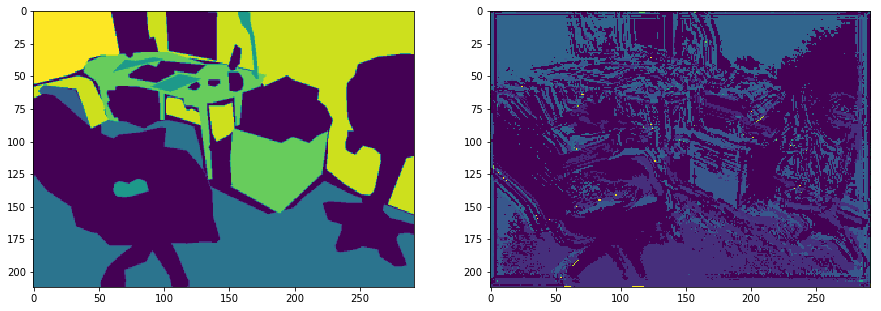

epoch :  1
loss :  3.18711


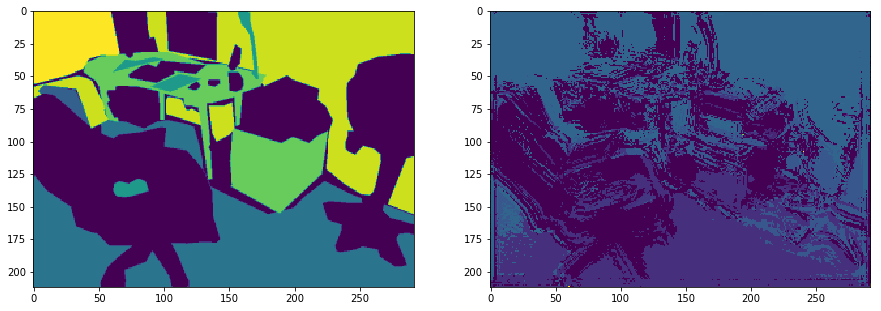

epoch :  2
loss :  2.39156


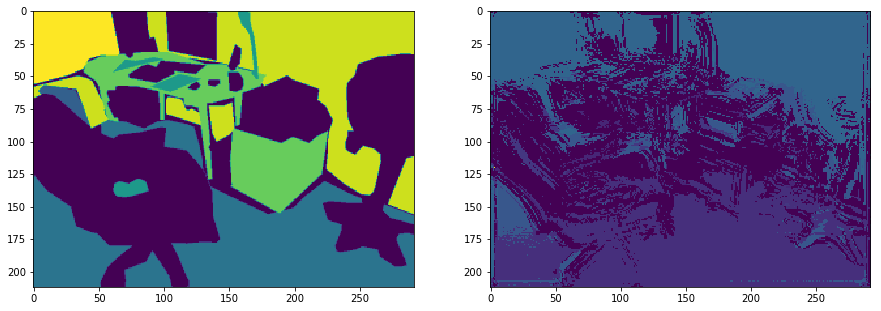

epoch :  3
loss :  2.3903


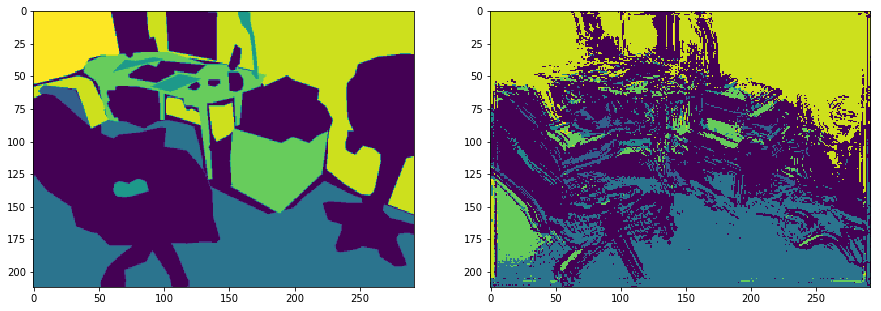

epoch :  4
loss :  2.27313


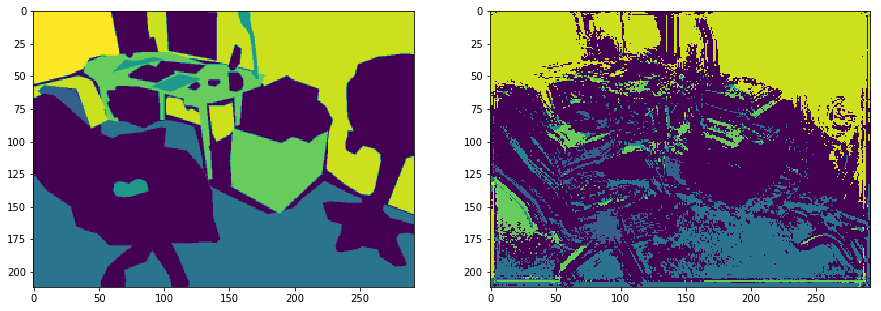

epoch :  5
loss :  2.20619


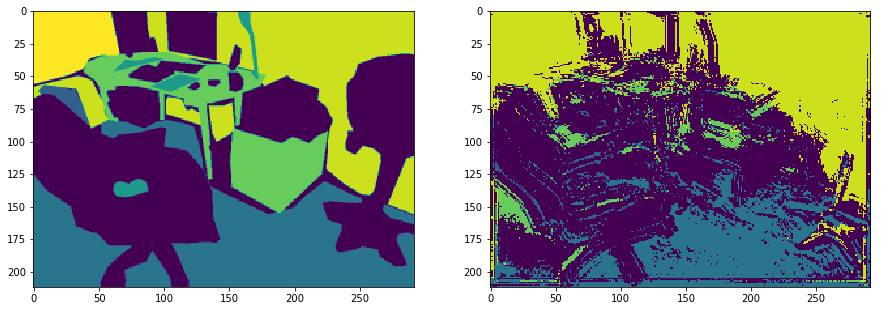

epoch :  6
loss :  2.12003


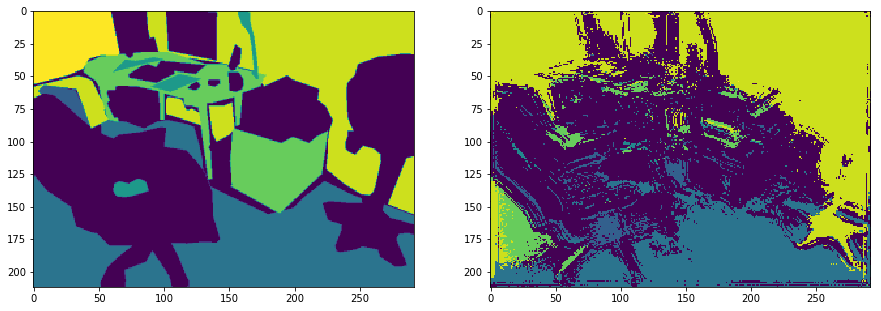

epoch :  7
loss :  2.09335


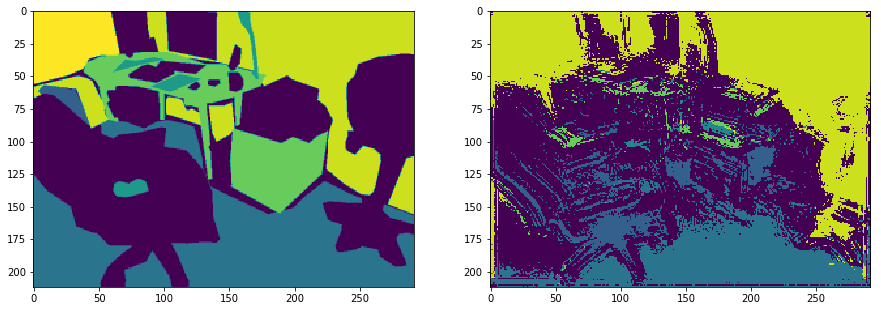

epoch :  8
loss :  2.05779


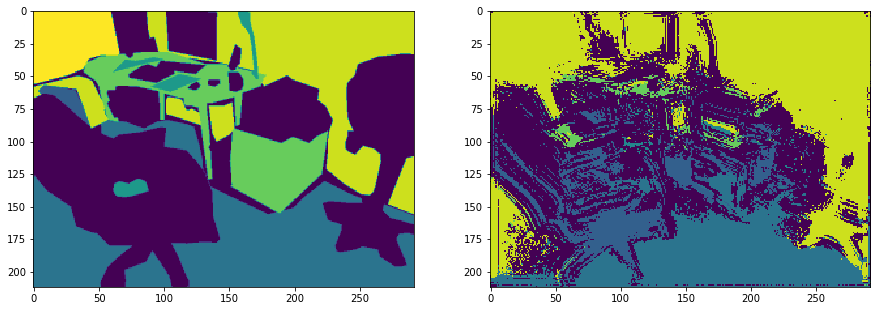

epoch :  9
loss :  2.0459


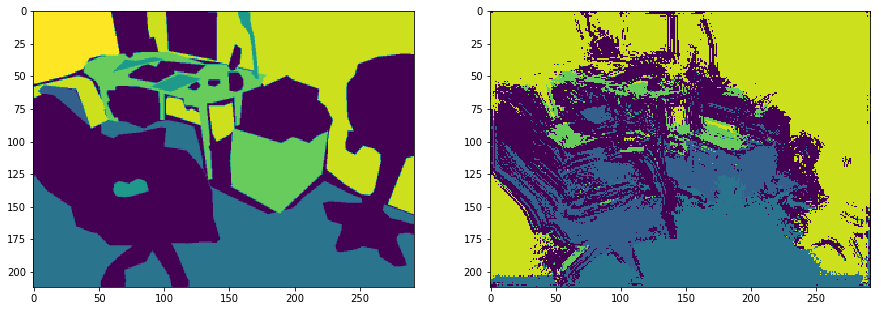

epoch :  10
loss :  2.03273


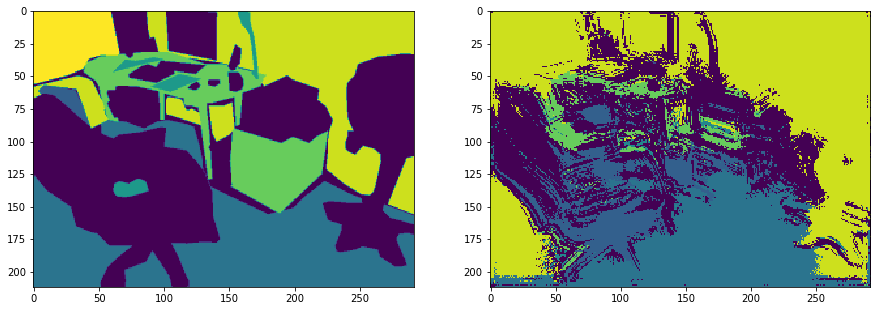

epoch :  11
loss :  2.02867


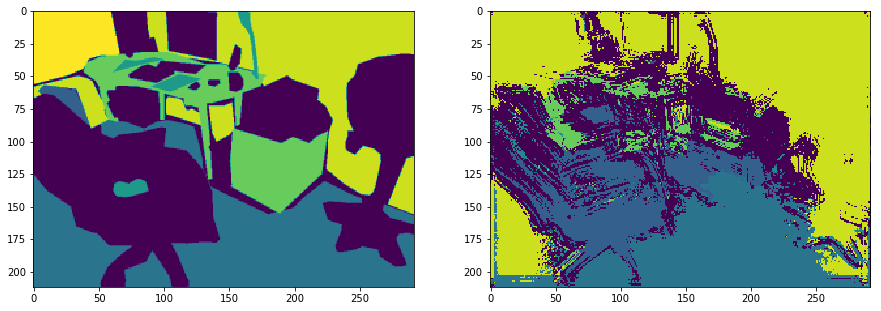

epoch :  12
loss :  2.04288


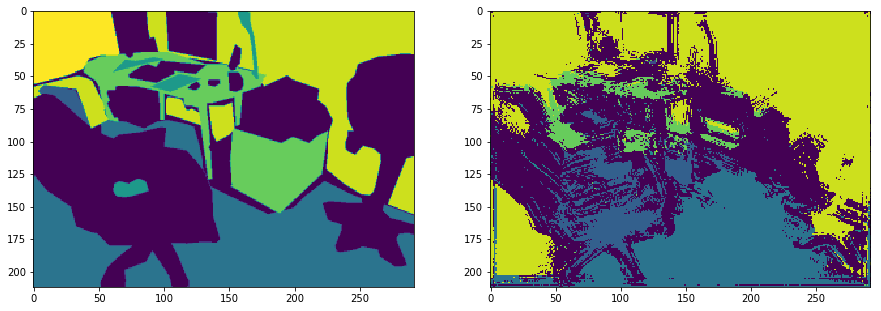

epoch :  13
loss :  1.97876


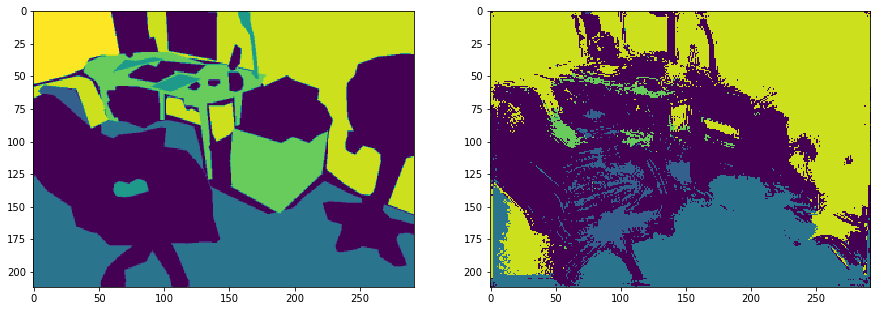

epoch :  14
loss :  1.95106


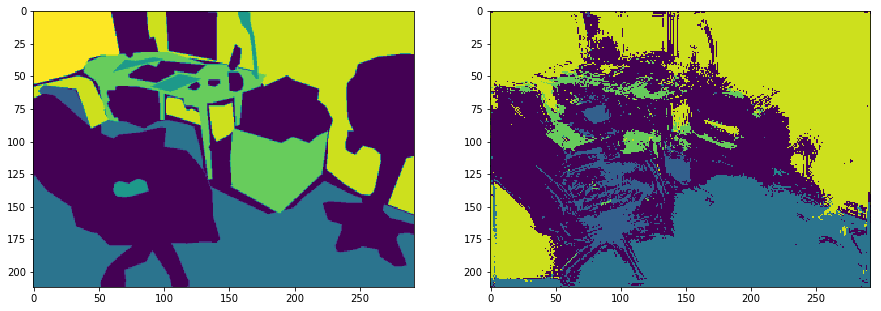

epoch :  15
loss :  1.90837


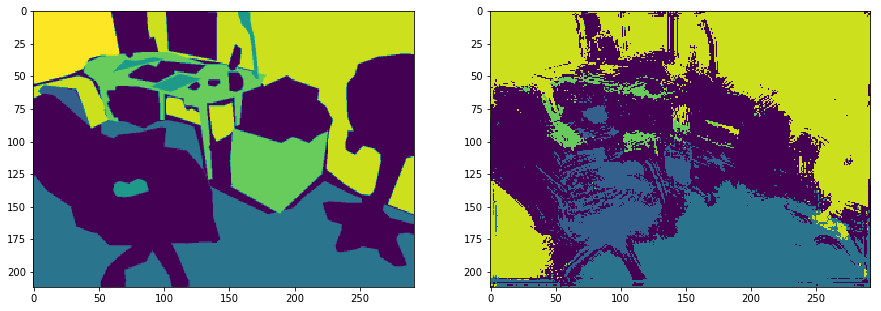

epoch :  16
loss :  1.89305


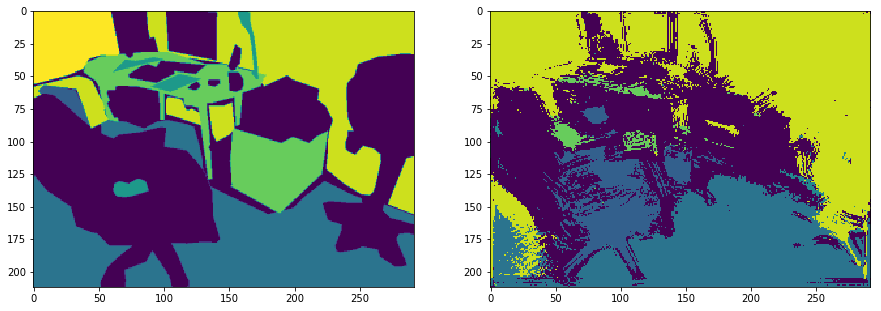

epoch :  17
loss :  1.83133


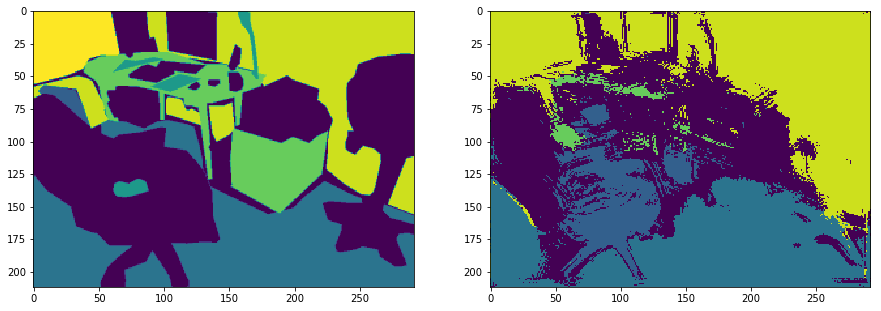

epoch :  18
loss :  1.8198


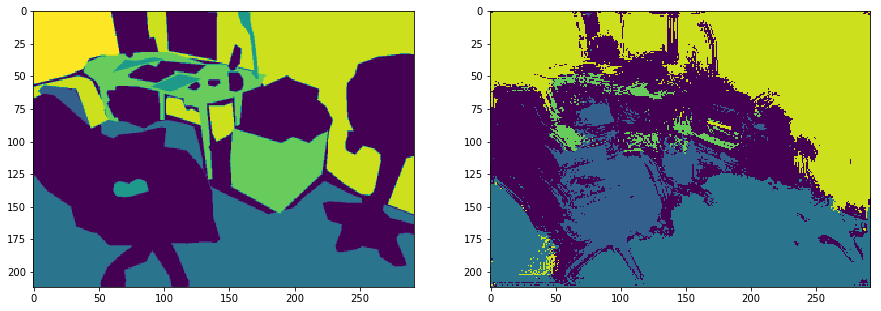

epoch :  19
loss :  1.8745


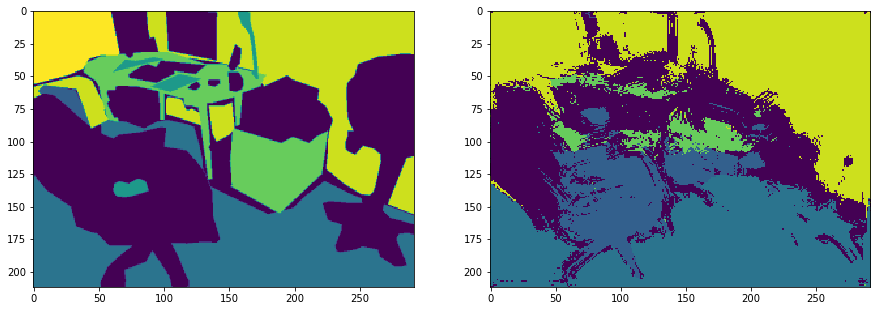

epoch :  20
loss :  1.82676


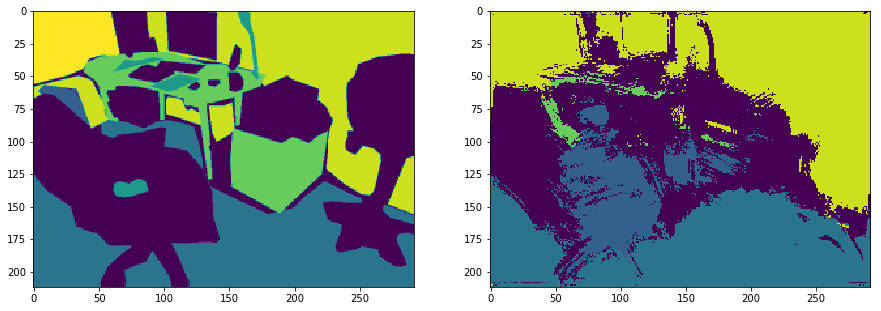

epoch :  21
loss :  1.82822


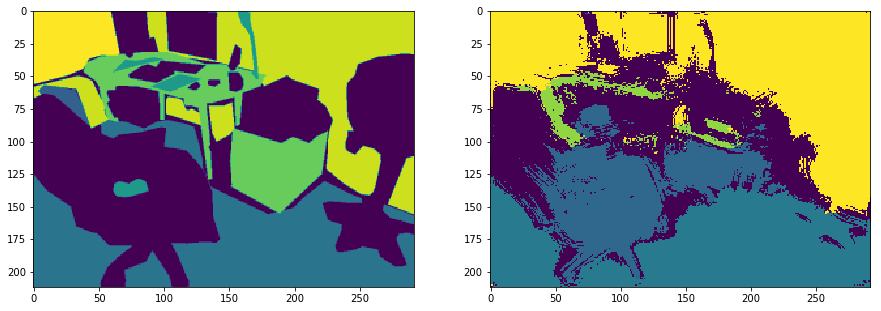

epoch :  22
loss :  1.78549


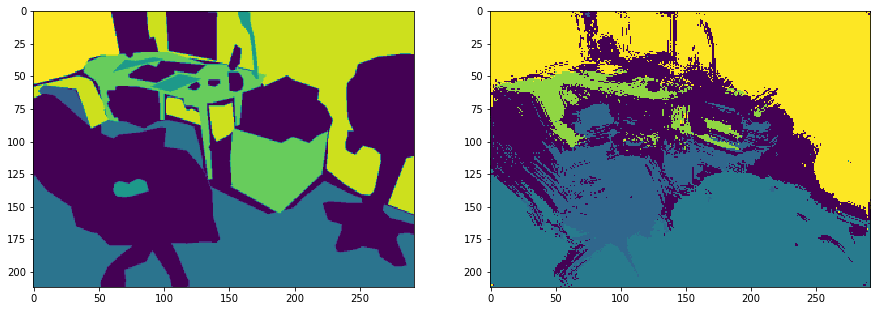

epoch :  23
loss :  1.86862


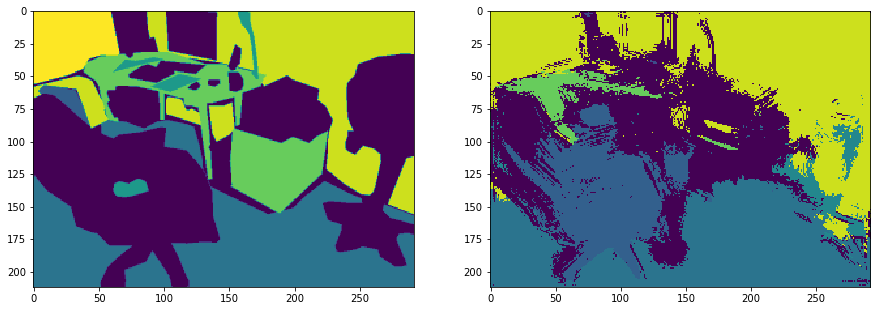

epoch :  24
loss :  1.75274


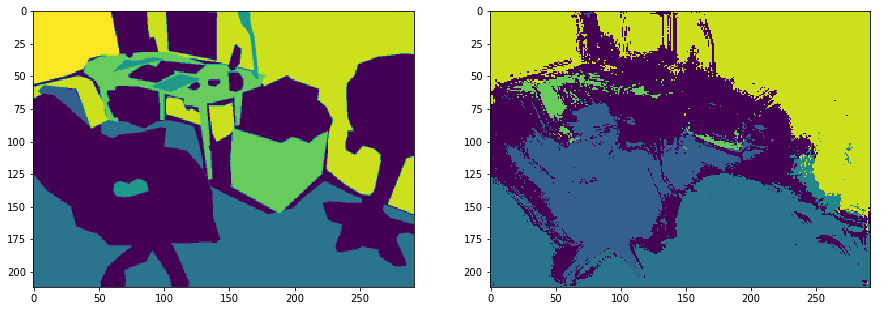

epoch :  25
loss :  1.70281


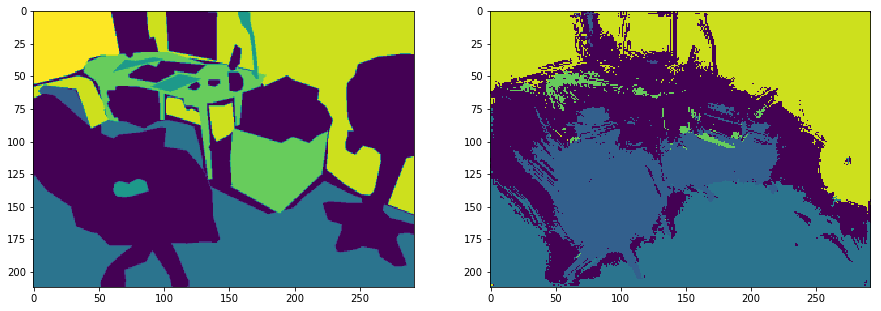

epoch :  26
loss :  1.68918


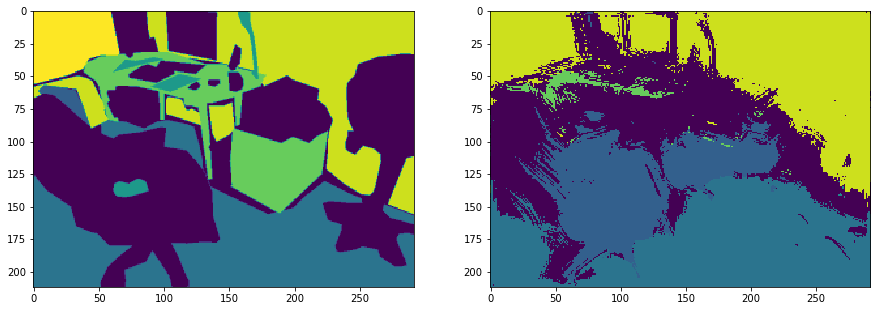

epoch :  27
loss :  1.733


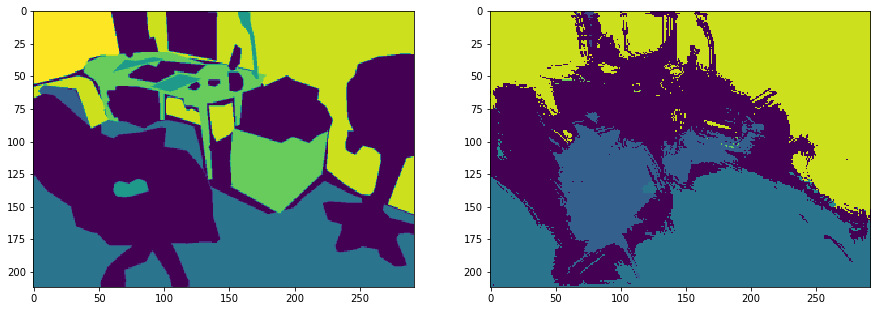

epoch :  28
loss :  1.69212


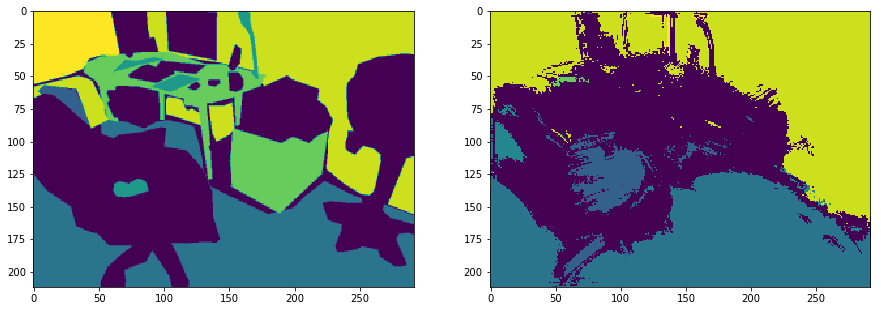

epoch :  29
loss :  1.64639


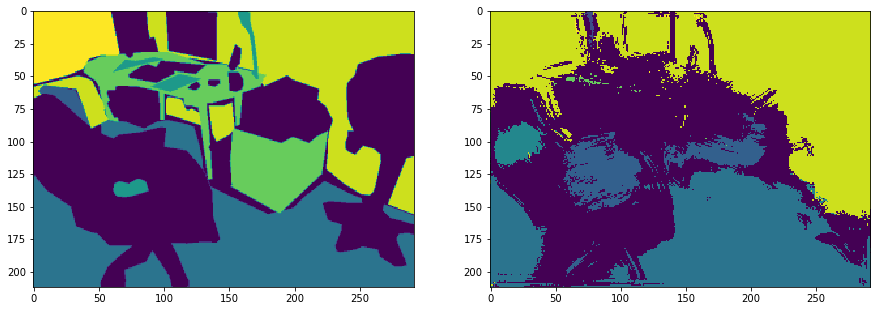

epoch :  30
loss :  1.55915


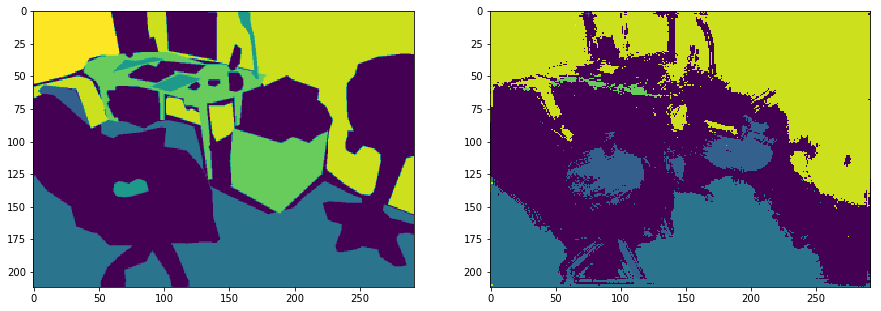

epoch :  31
loss :  1.49526


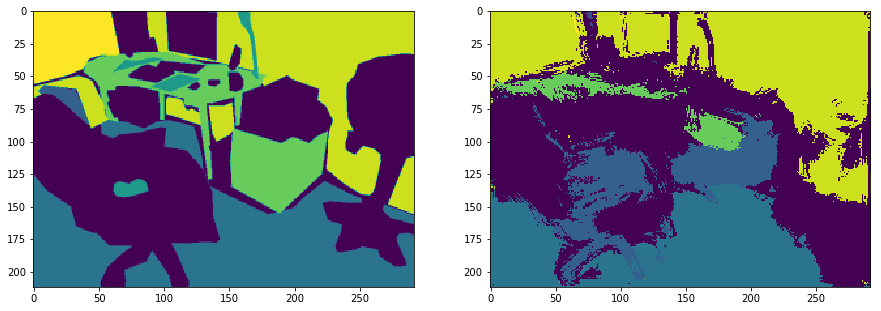

epoch :  32
loss :  1.44949


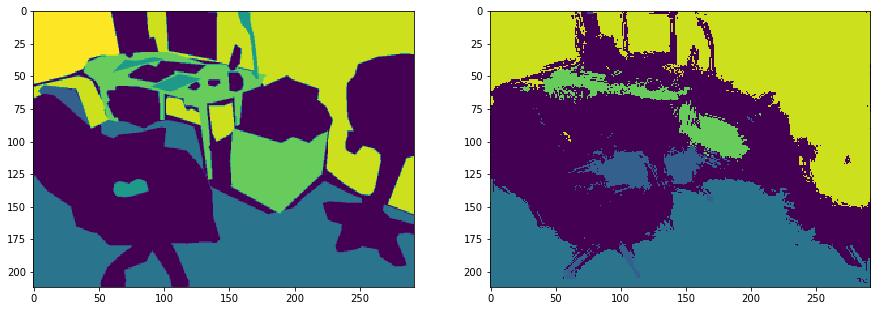

epoch :  33
loss :  1.37356


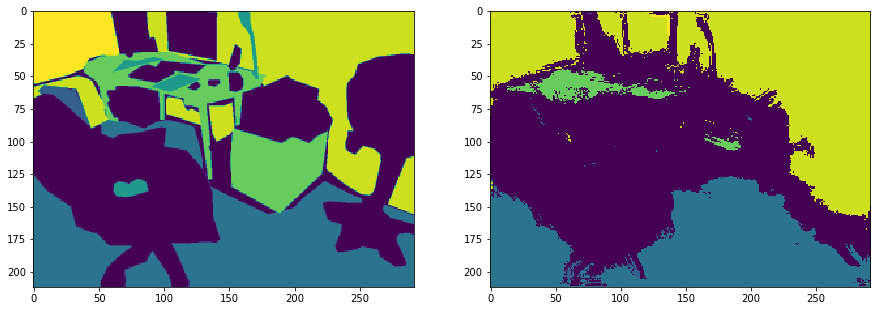

epoch :  34
loss :  1.33969


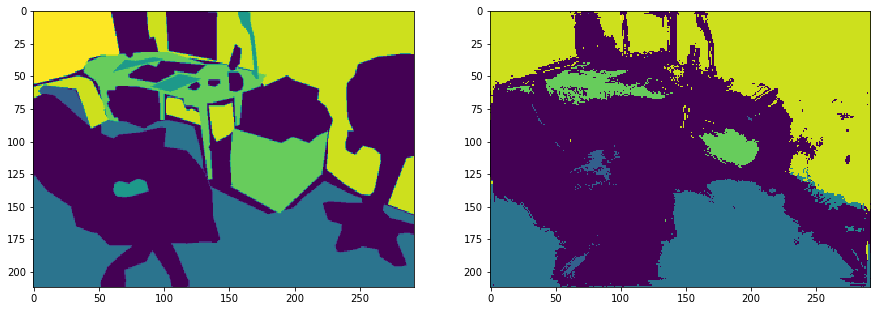

epoch :  35
loss :  1.23861


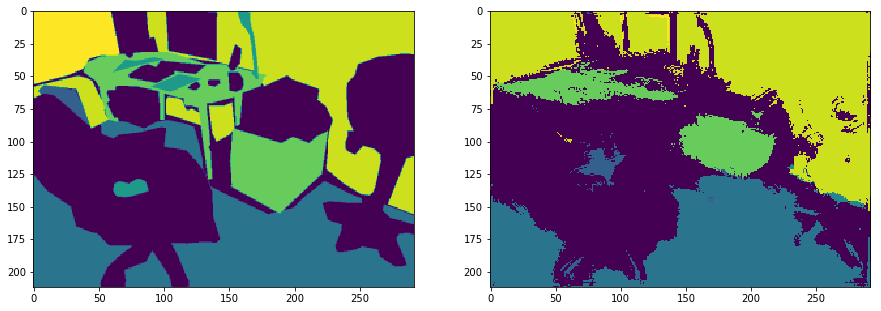

epoch :  36
loss :  1.29636


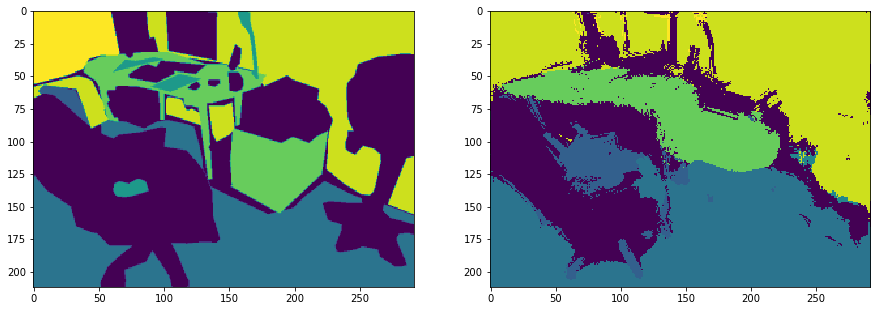

epoch :  37
loss :  1.10849


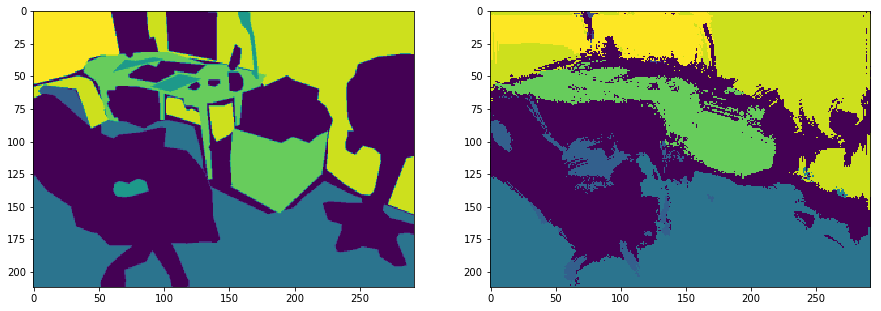

epoch :  38
loss :  1.05774


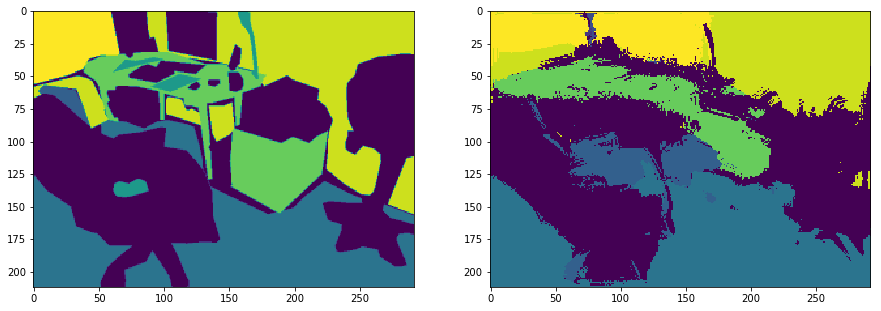

epoch :  39
loss :  1.06392


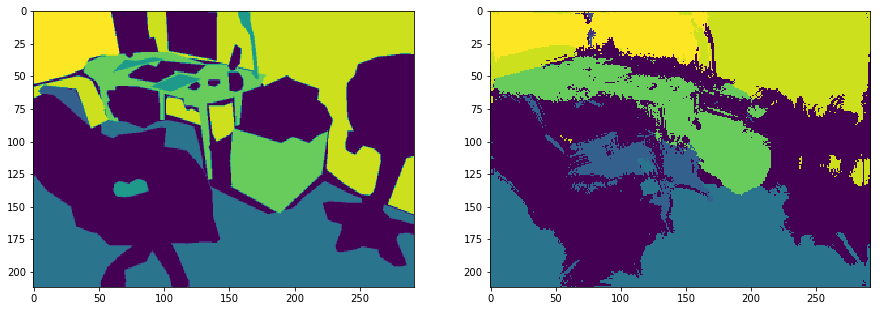

epoch :  40
loss :  1.27911


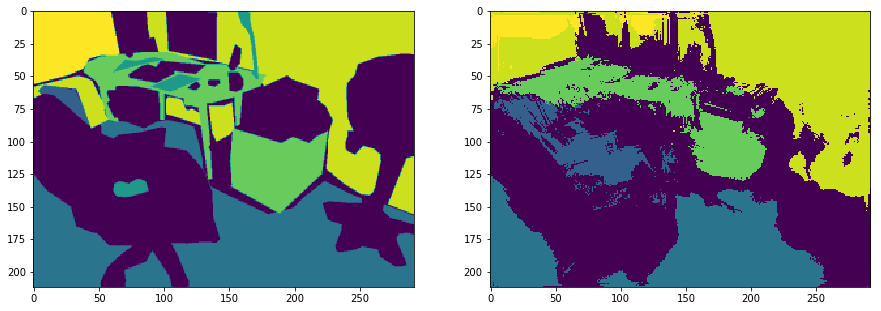

epoch :  41
loss :  1.12227


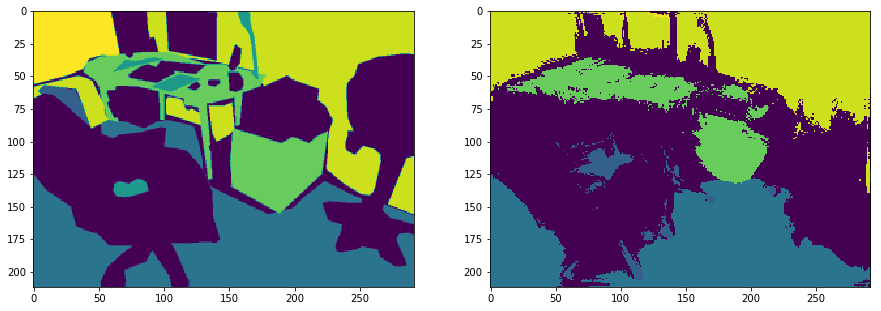

epoch :  42
loss :  0.994916


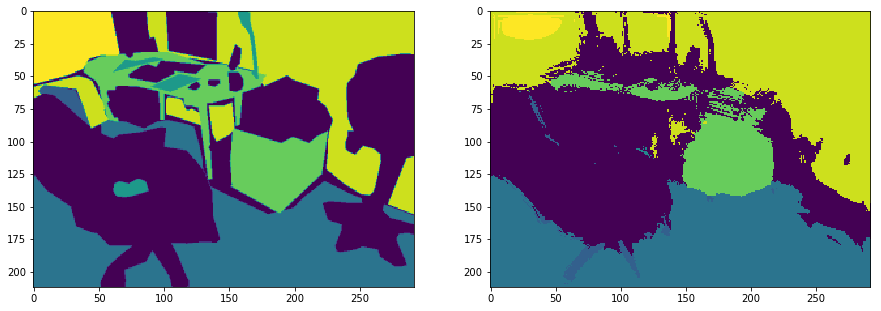

epoch :  43
loss :  0.901414


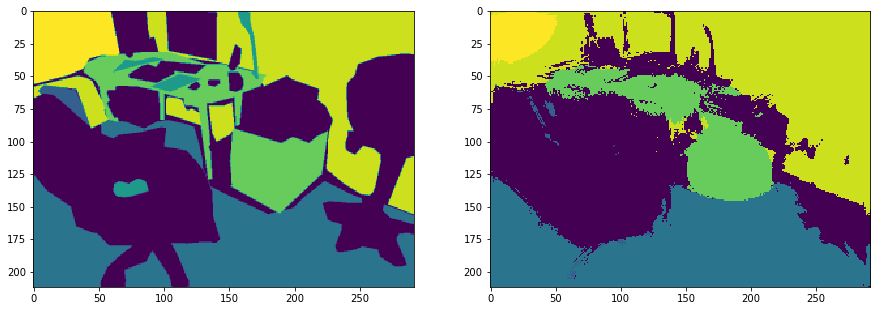

epoch :  44
loss :  0.769284


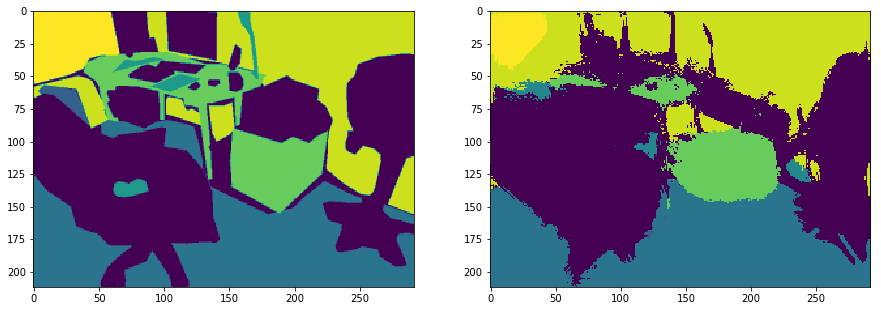

epoch :  45
loss :  0.726427


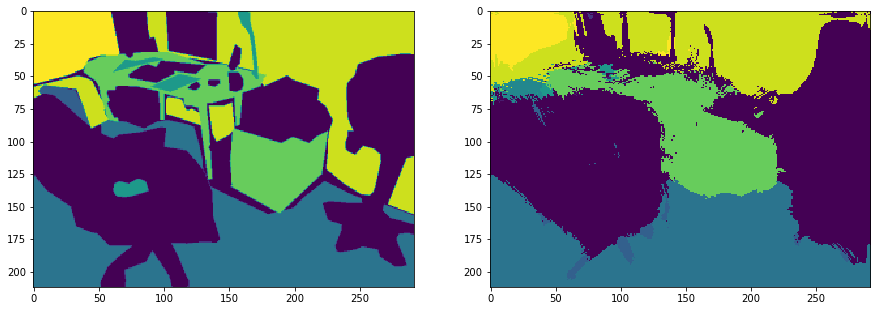

epoch :  46
loss :  0.755434


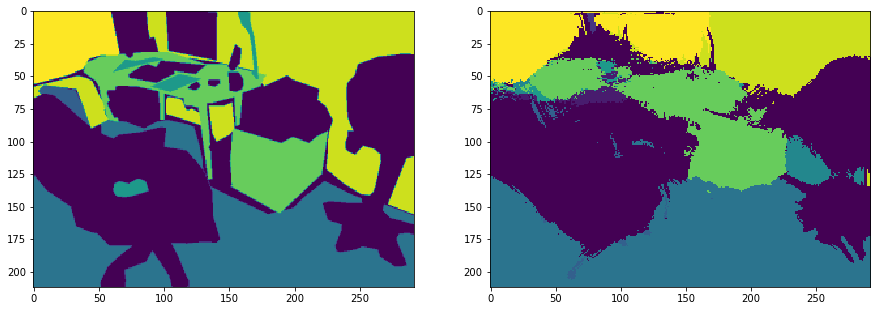

epoch :  47
loss :  0.701933


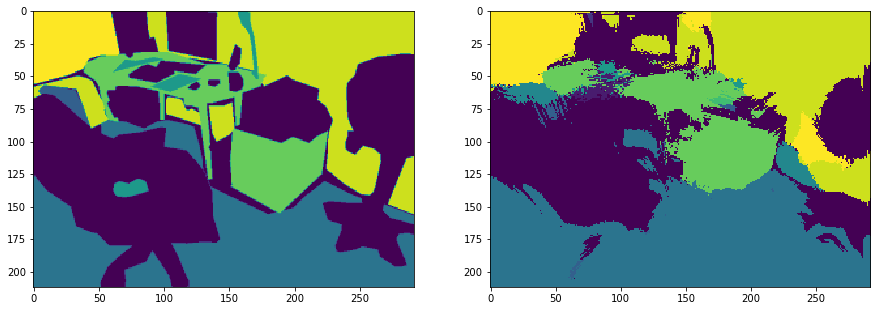

epoch :  48
loss :  0.79402


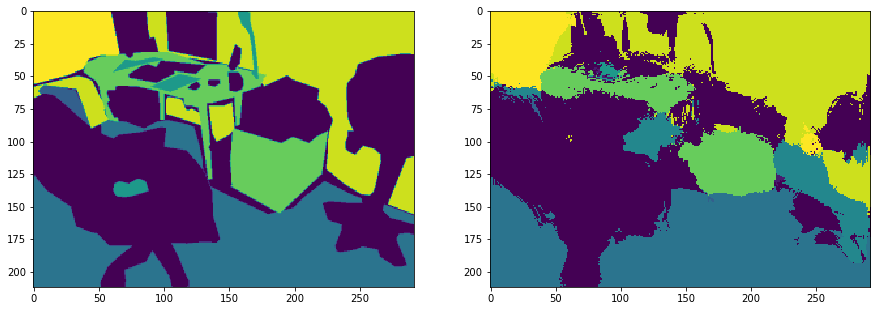

epoch :  49
loss :  0.656045


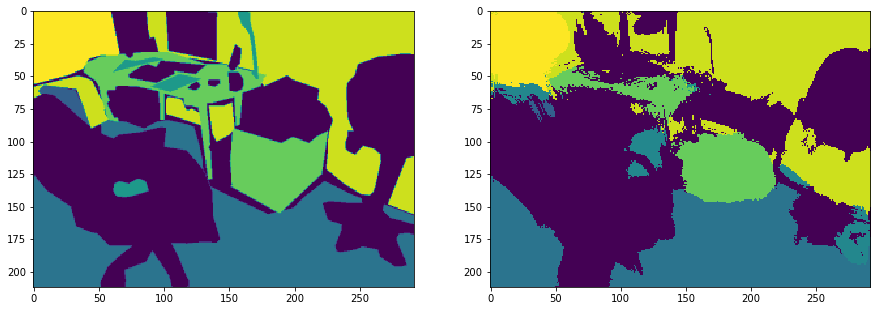

epoch :  50
loss :  0.645935


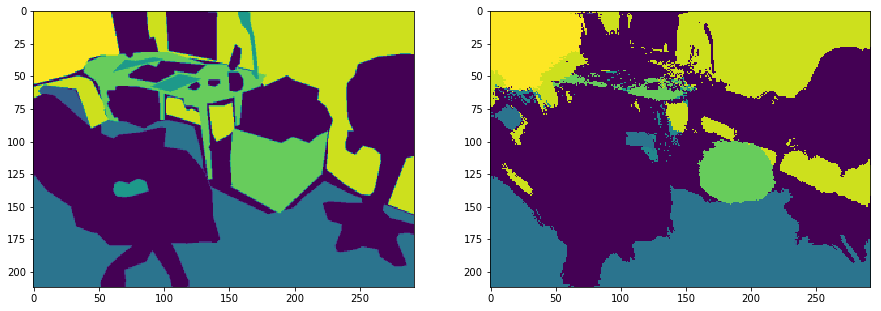

epoch :  51
loss :  0.65211


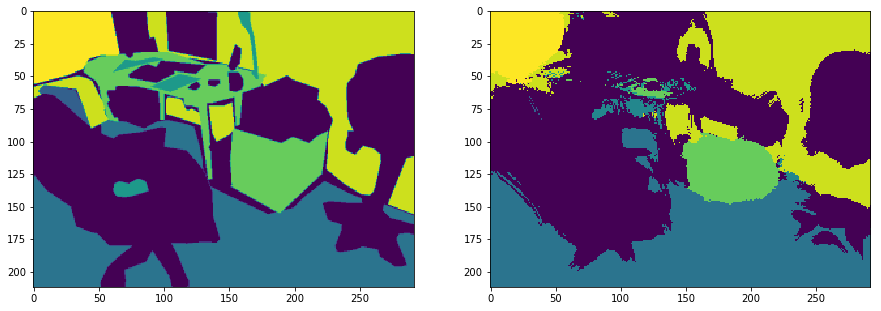

epoch :  52
loss :  0.613928


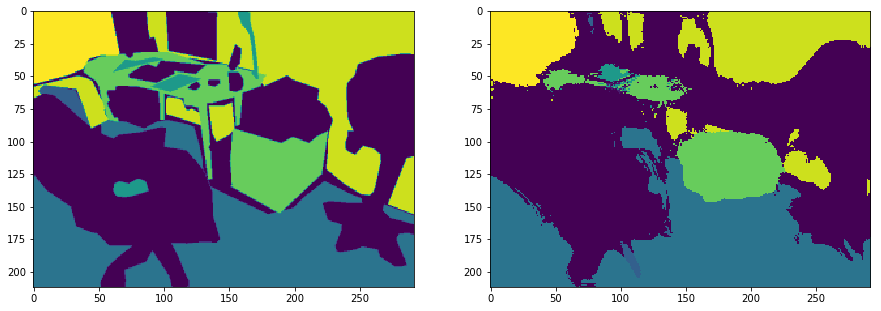

epoch :  53
loss :  0.64436


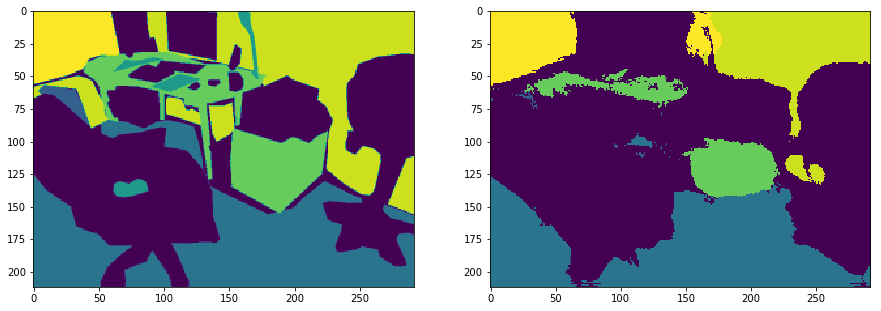

epoch :  54
loss :  0.630983


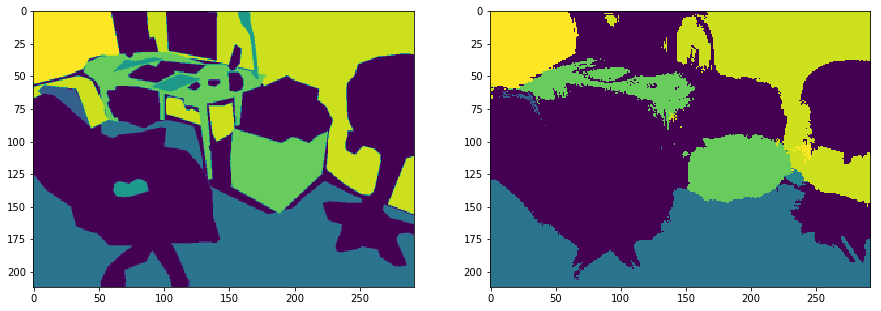

epoch :  55
loss :  0.524081


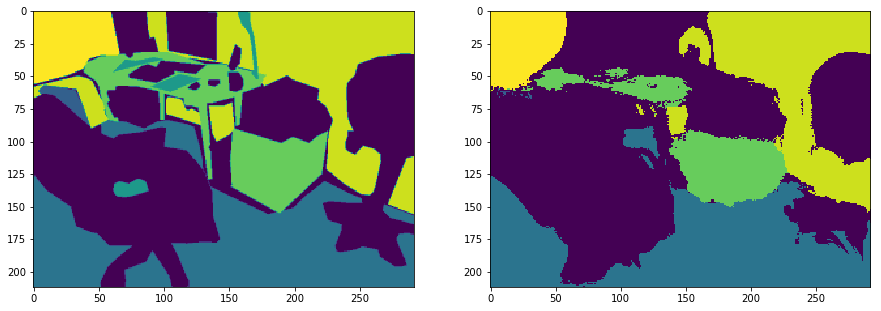

epoch :  56
loss :  0.562856


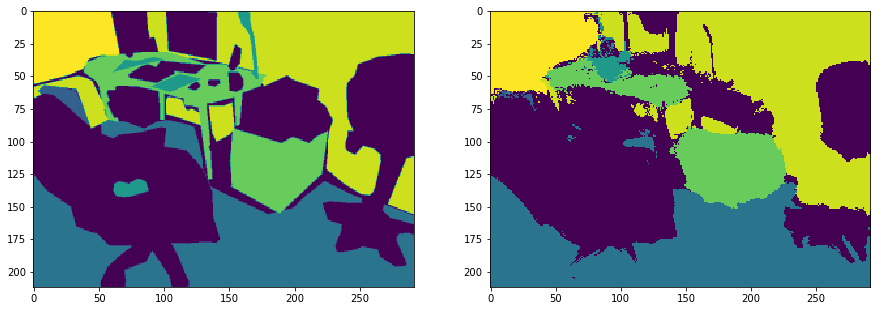

epoch :  57
loss :  0.518434


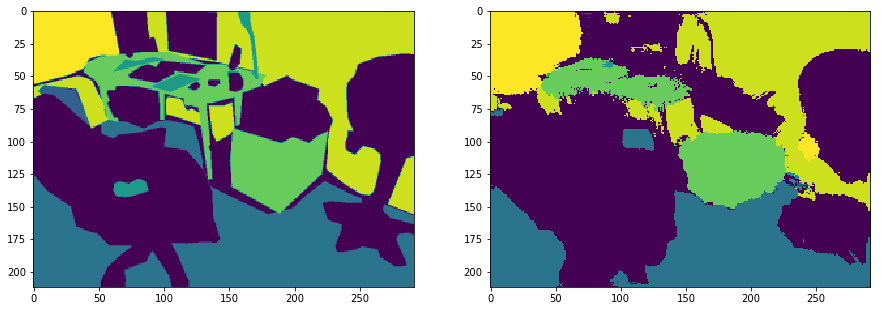

epoch :  58
loss :  0.546886


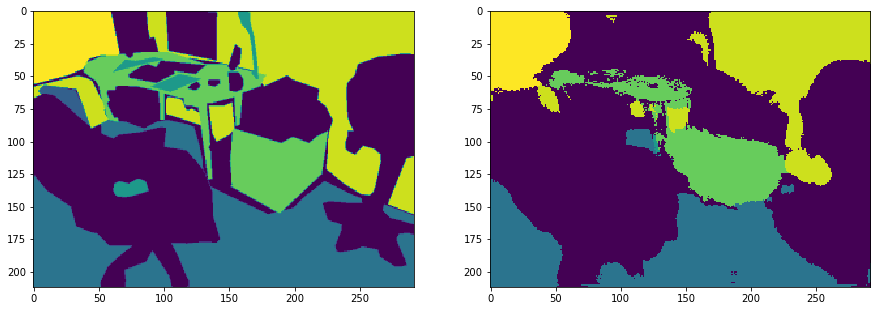

epoch :  59
loss :  0.717946


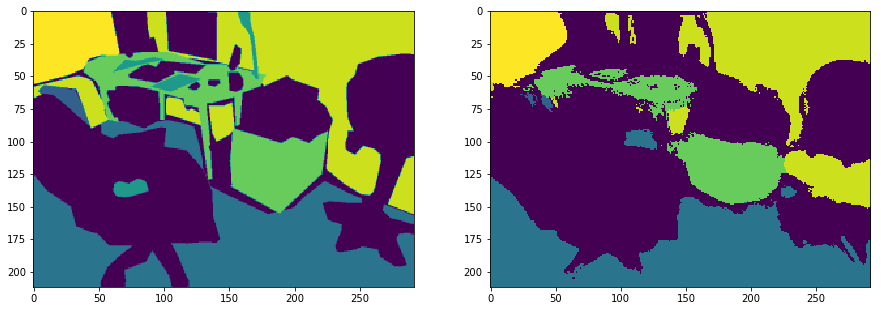

epoch :  60
loss :  0.521617


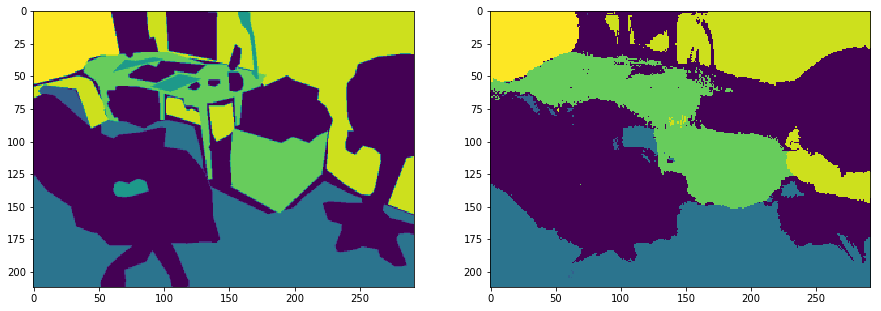

epoch :  61
loss :  0.488034


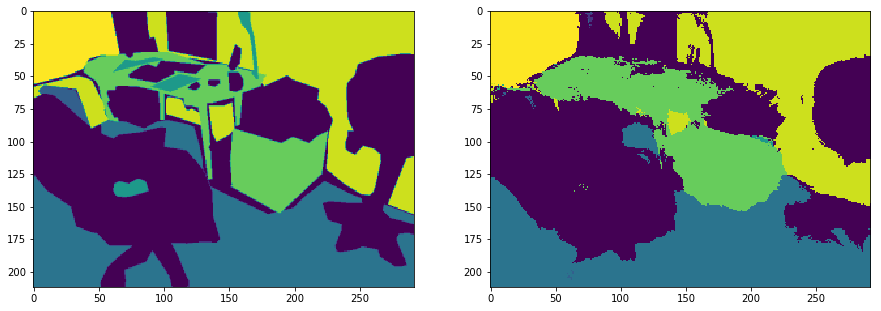

epoch :  62
loss :  0.543557


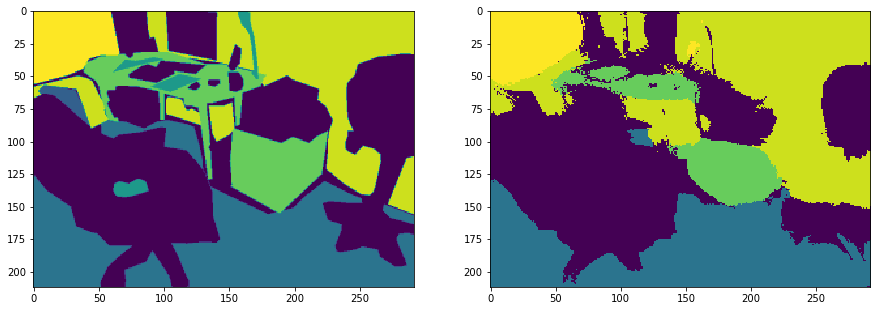

epoch :  63
loss :  0.450251


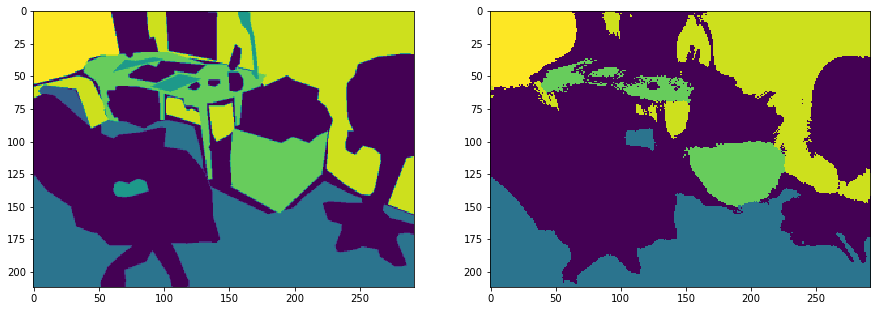

epoch :  64
loss :  0.522977


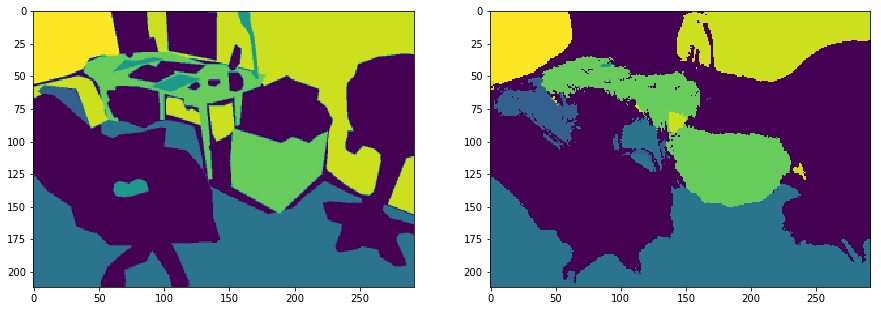

epoch :  65
loss :  0.44887


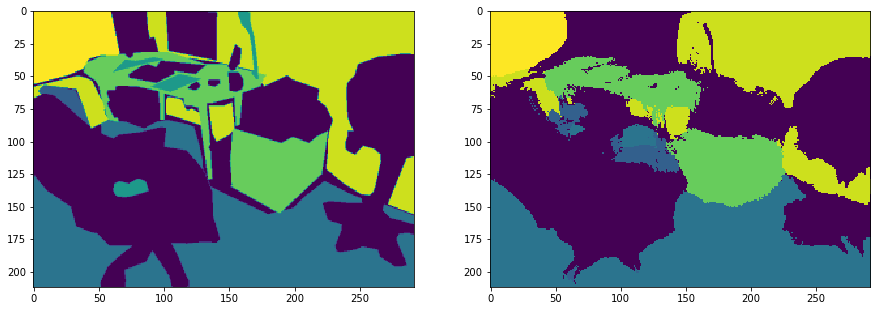

epoch :  66
loss :  0.428578


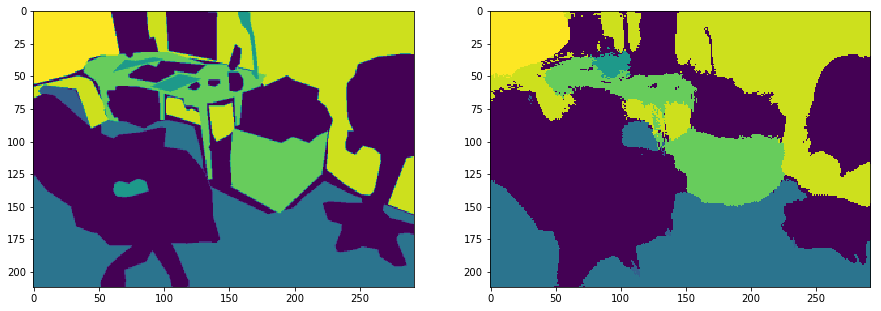

epoch :  67
loss :  0.502644


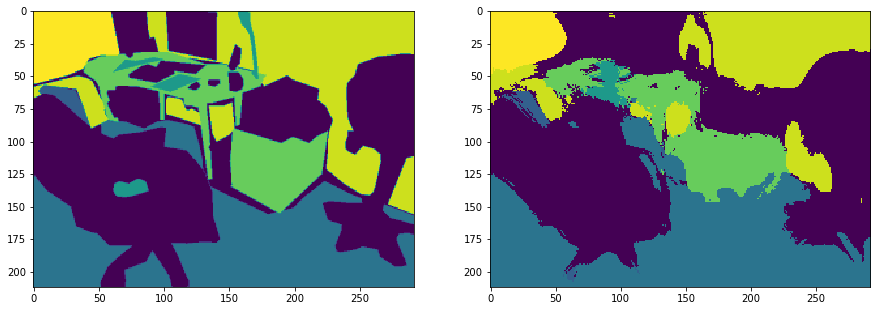

epoch :  68
loss :  0.491478


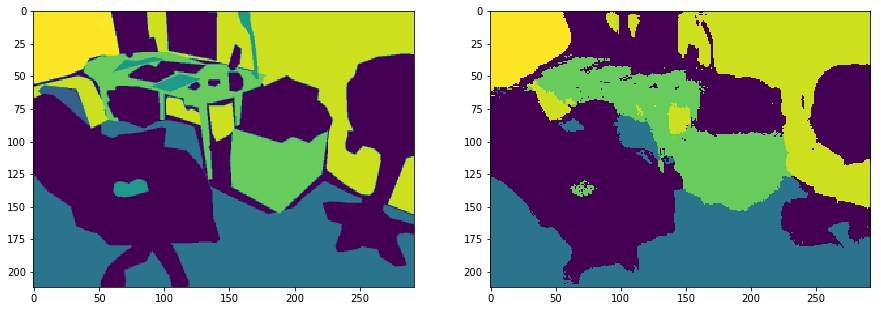

epoch :  69
loss :  0.467149


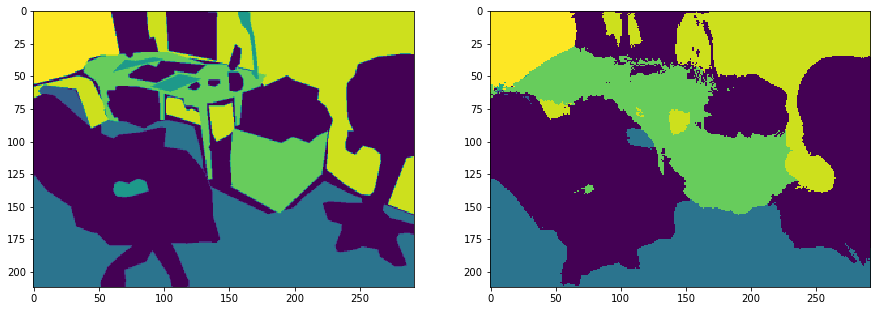

epoch :  70
loss :  0.429566


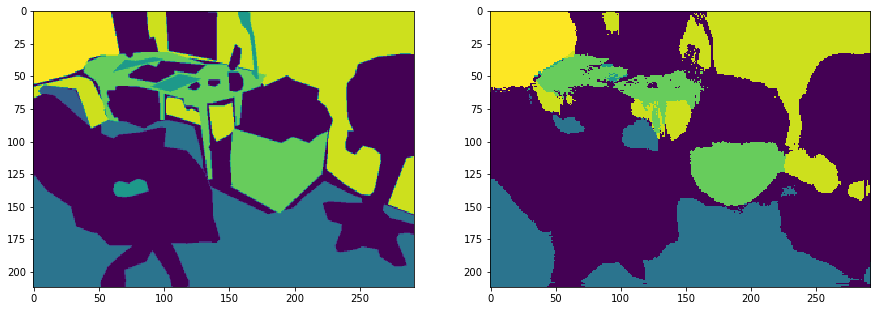

epoch :  71
loss :  0.425094


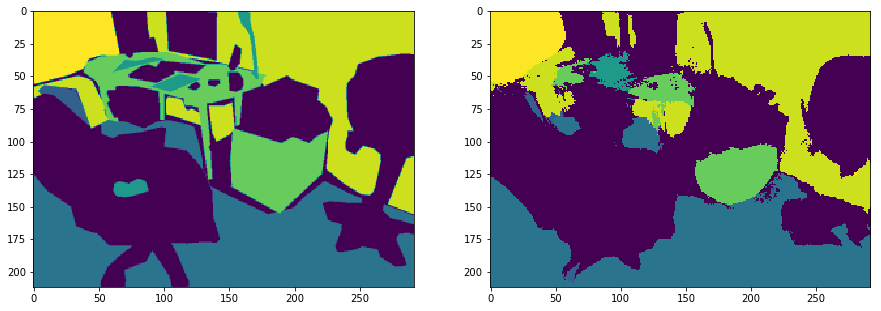

epoch :  72
loss :  0.447269


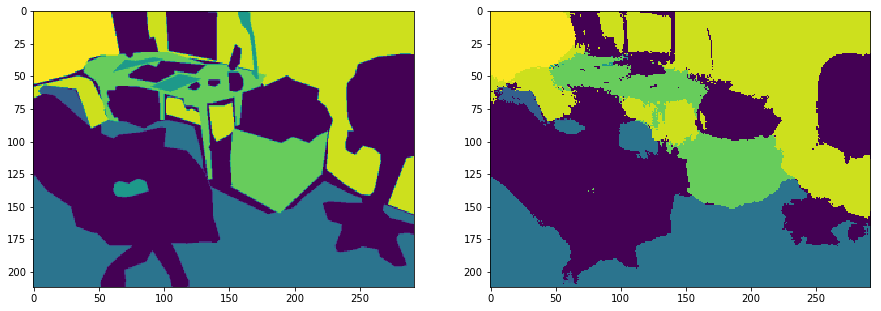

epoch :  73
loss :  0.567293


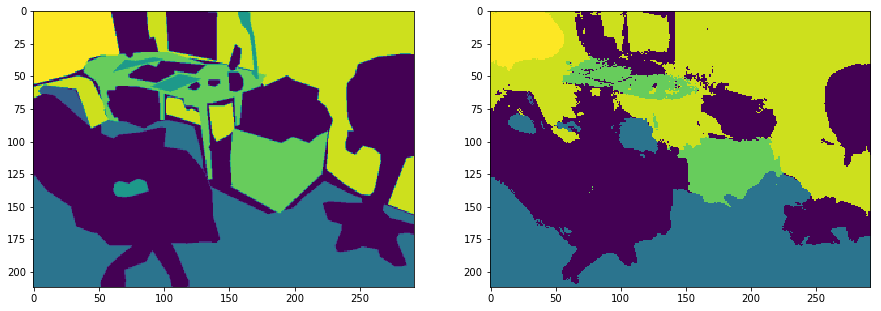

epoch :  74
loss :  0.683357


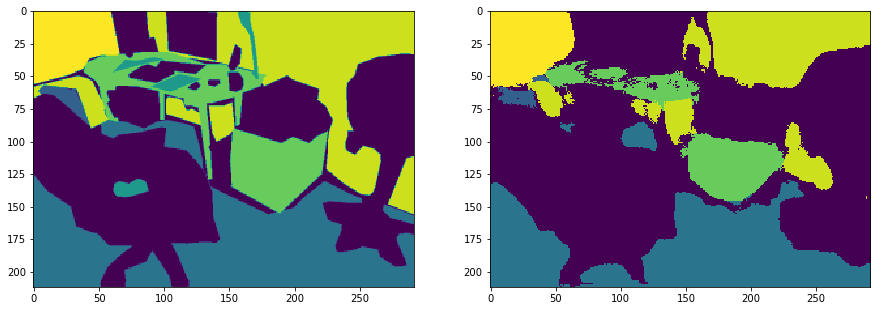

epoch :  75
loss :  0.412397


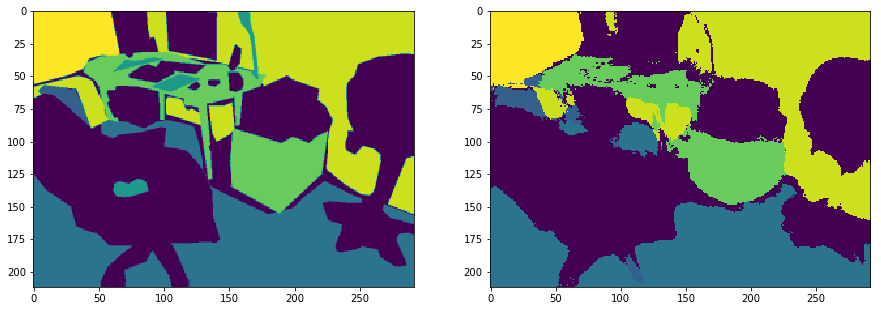

epoch :  76
loss :  0.400243


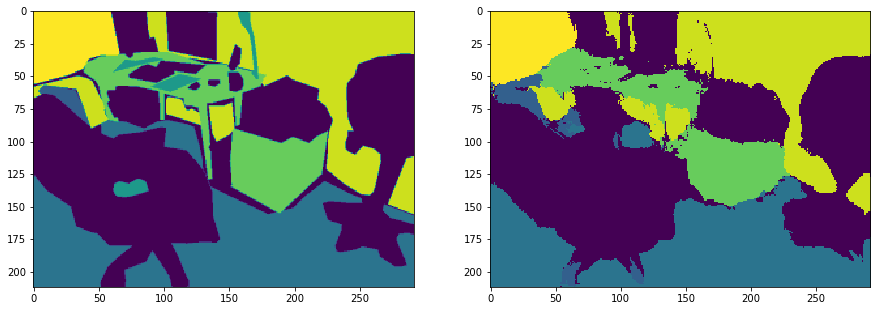

epoch :  77
loss :  0.427353


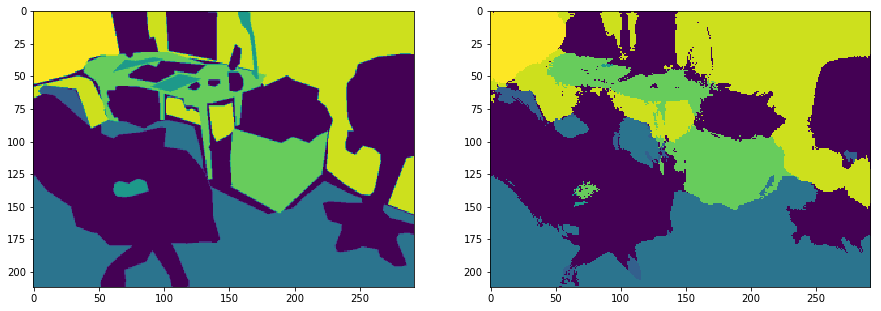

epoch :  78
loss :  0.459895


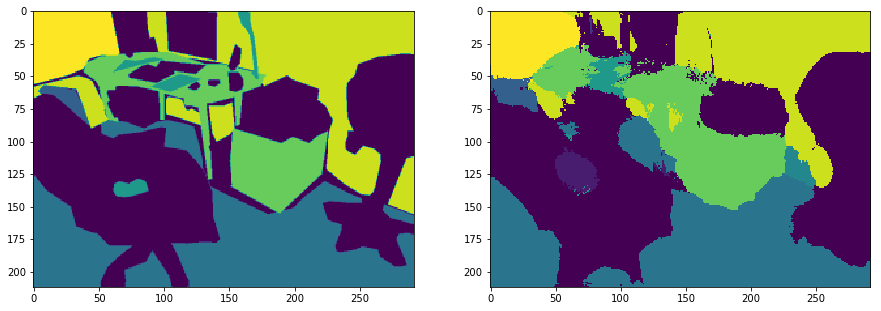

epoch :  79
loss :  0.397264


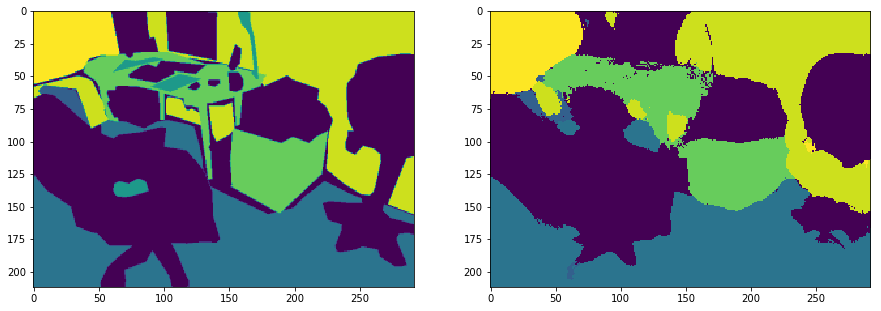

epoch :  80
loss :  0.457181


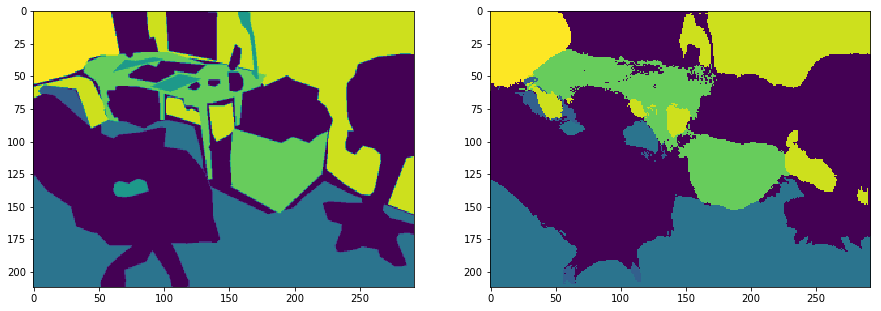

epoch :  81
loss :  0.39771


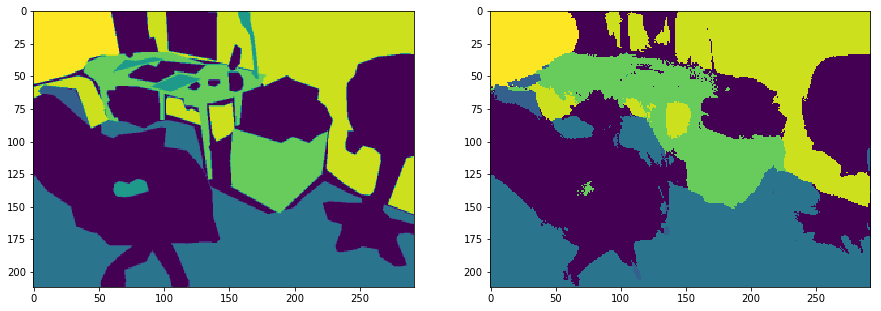

epoch :  82
loss :  0.389921


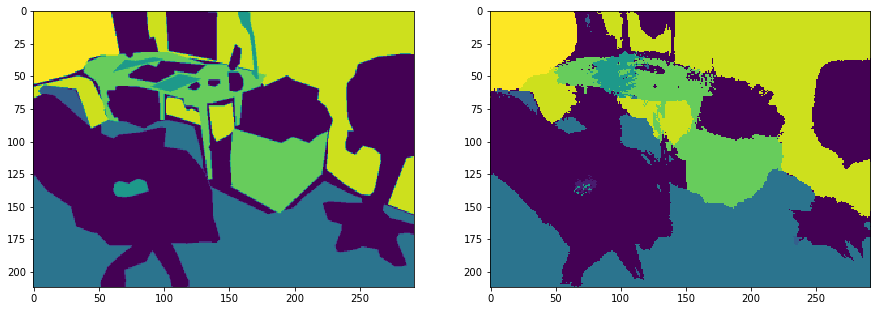

epoch :  83
loss :  0.372559


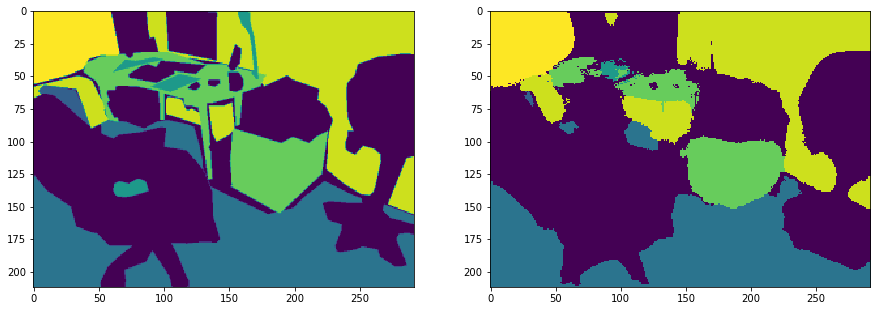

epoch :  84
loss :  0.438287


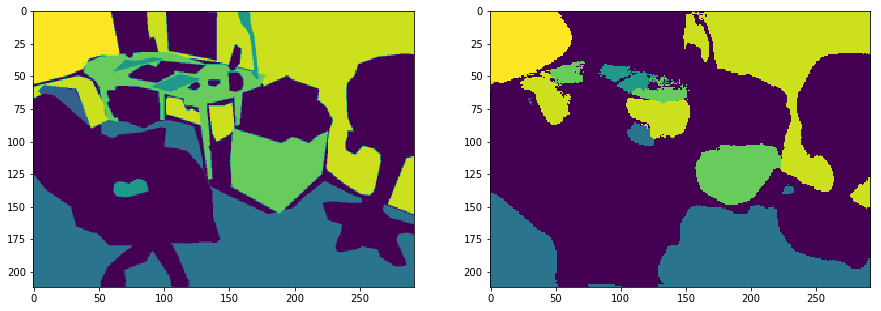

epoch :  85
loss :  0.385373


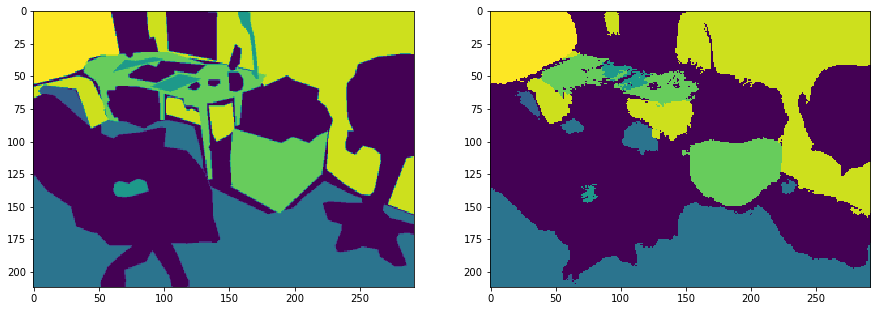

epoch :  86
loss :  0.385196


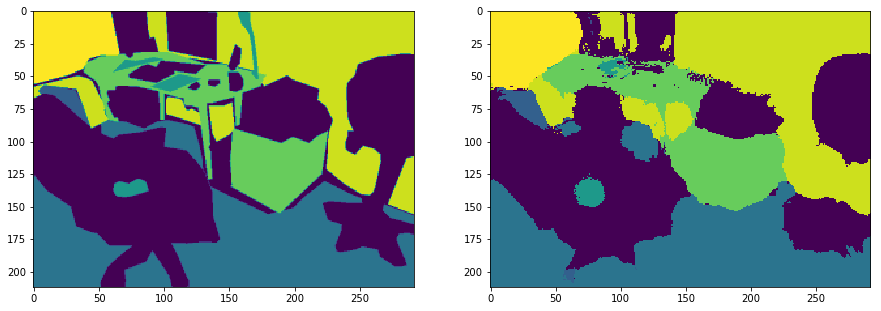

epoch :  87
loss :  0.387387


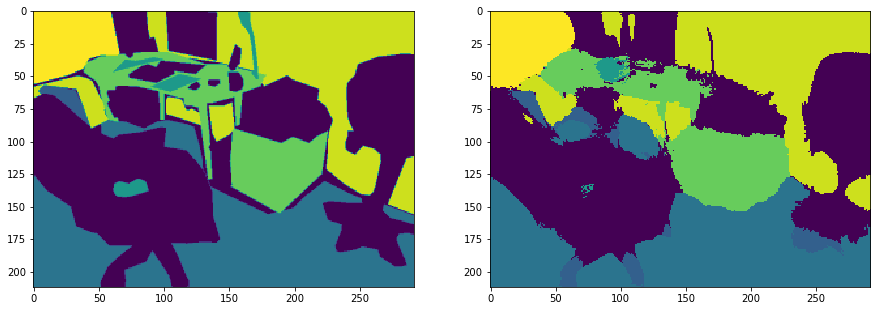

epoch :  88
loss :  0.399179


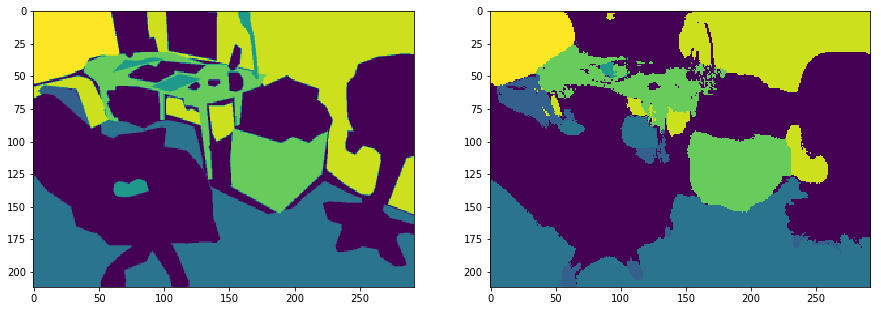

epoch :  89
loss :  0.371225


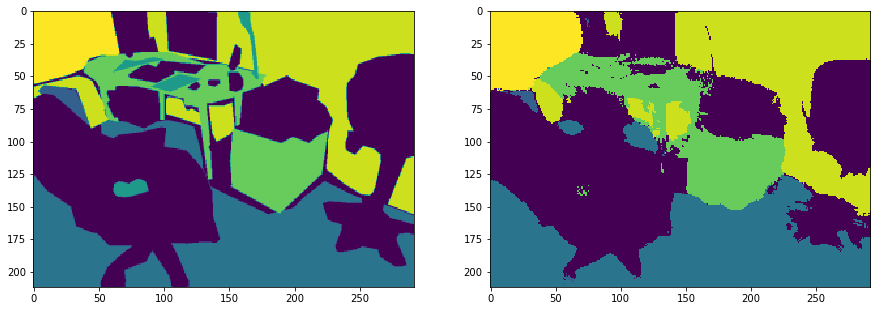

epoch :  90
loss :  0.364134


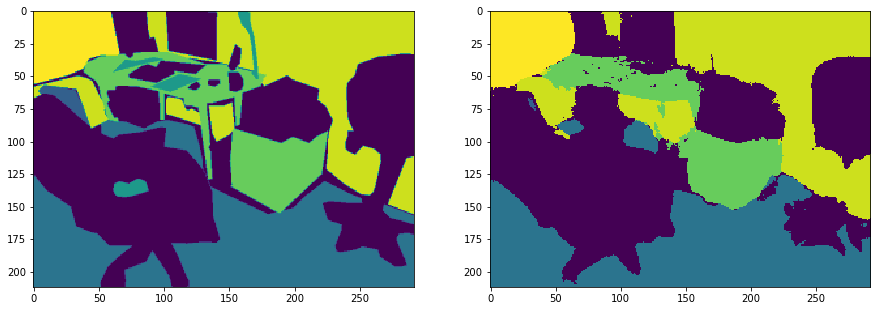

epoch :  91
loss :  0.36981


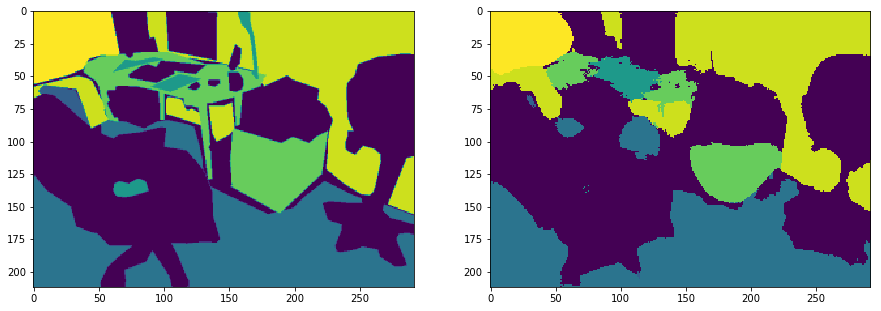

epoch :  92
loss :  0.3338


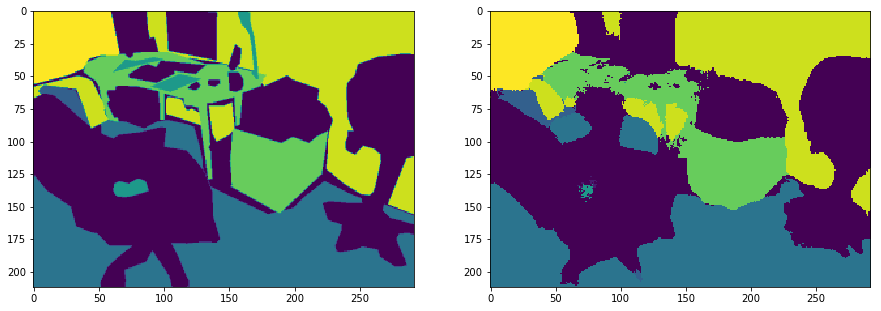

epoch :  93
loss :  0.354182


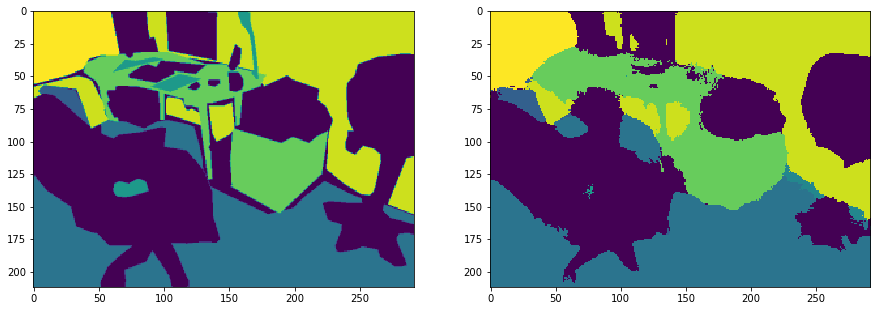

epoch :  94
loss :  0.34899


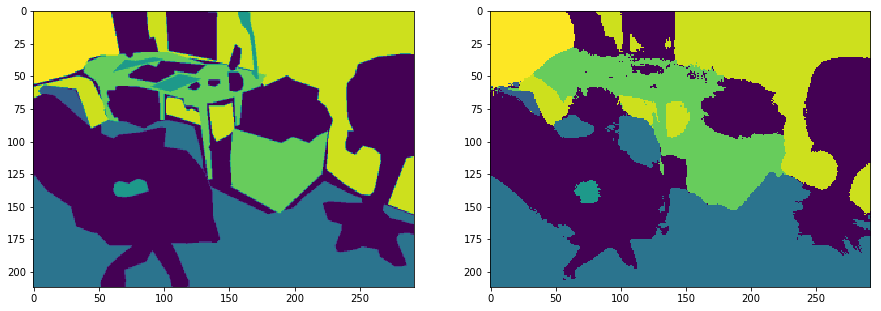

epoch :  95
loss :  0.332086


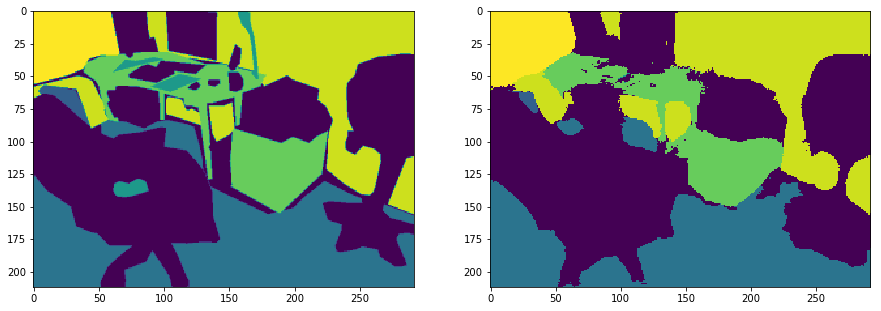

epoch :  96
loss :  0.359527


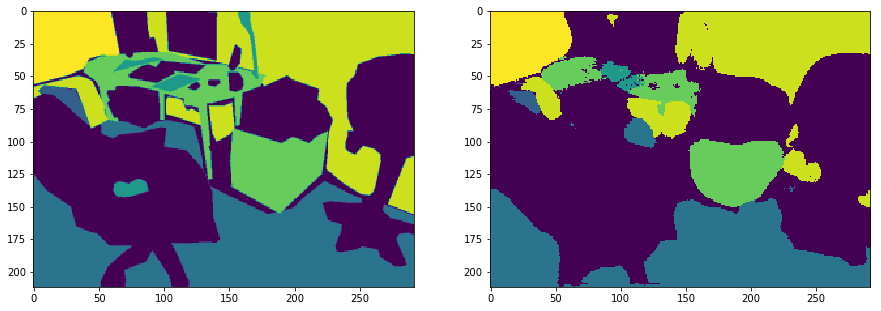

epoch :  97
loss :  0.332733


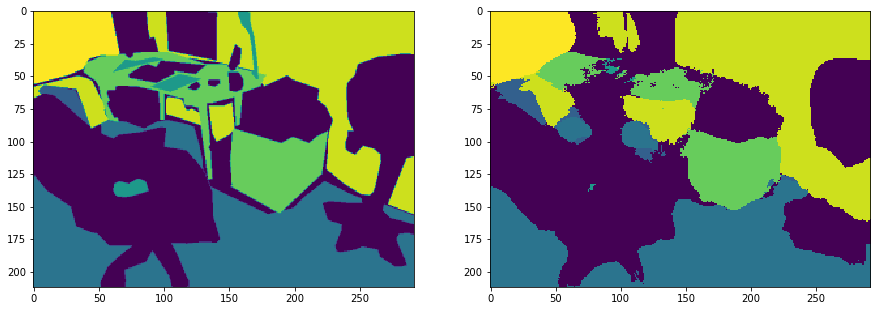

epoch :  98
loss :  0.337796


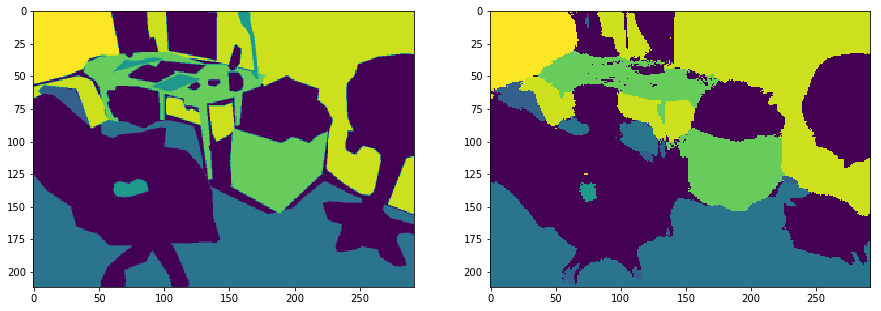

epoch :  99
loss :  0.331572


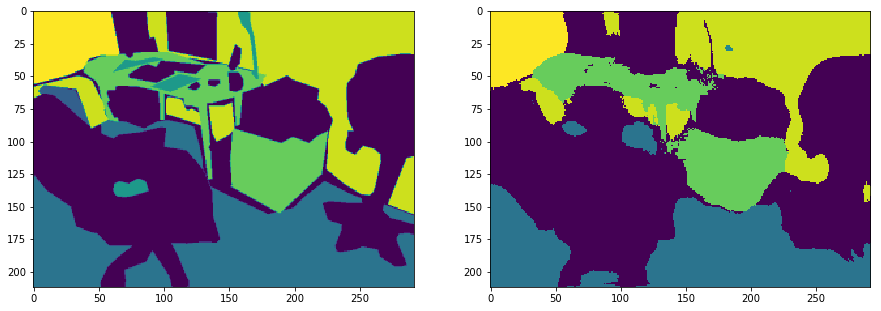

In [70]:
print("Learning start")
sess=tf.Session()
sess.run(tf.global_variables_initializer())


for epoch in range(training_epochs):
    a=0
    total_batch = int(math.ceil(len(train_image)/batch_size))
    print("epoch : ",epoch)
    for i in range(total_batch):
        if a+batch_size>len(train_image):
            batch_xs=train_image[a:]
            batch_ys=train_label[a:]
        else:
            batch_xs=train_image[a:a+batch_size]
            batch_ys=train_label[a:a+batch_size]
        feed_dict={x:batch_xs, y:batch_ys}
        y_img,img,l,_=sess.run([y_image,image,cost,optimizer], feed_dict=feed_dict)
        if l==tf.is_nan:
            break
        for i in range(len(batch_xs)):
            im=np.minimum(img[i,:,:]*5,255)
            cv2.imwrite('output1/output_img-'+str(a+i+1).zfill(6)+'.jpg',im)

        a=a+batch_size
    
    print("loss : ", l)
    plt.figure(figsize=(15,15))
    y_im=np.minimum(y_img[0,:,:]*5,255)
    im1=np.minimum(img[0,:,:]*5,255)
    plt.subplot(1,2,1); plt.imshow(y_im)       
    plt.subplot(1,2,2); plt.imshow(im1)
    plt.show()

In [ ]:
test_img=sess.run([image],feed_dict={x:test_image, y:new_test_label})


epoch :  0
loss :  0.359836


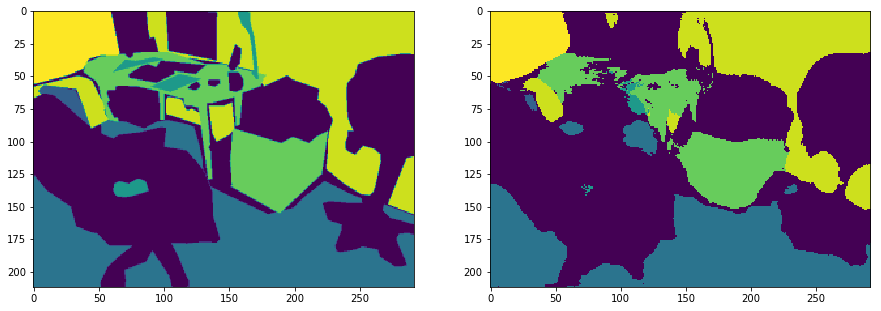

epoch :  1
loss :  0.314803


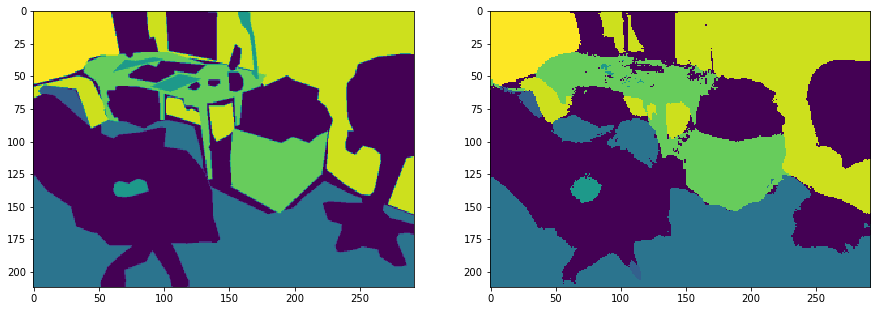

epoch :  2
loss :  0.392173


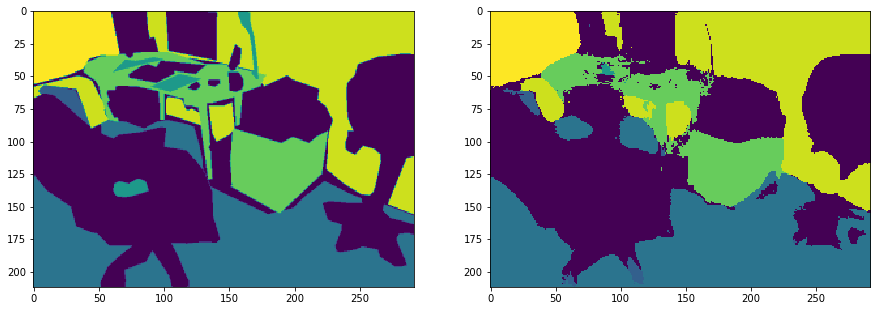

epoch :  3
loss :  0.3673


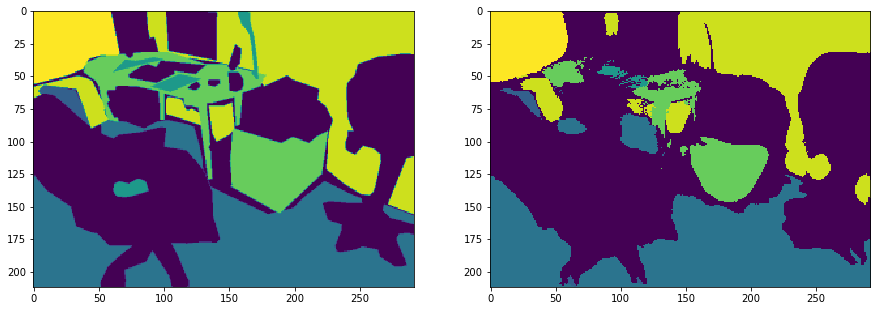

epoch :  4
loss :  0.328834


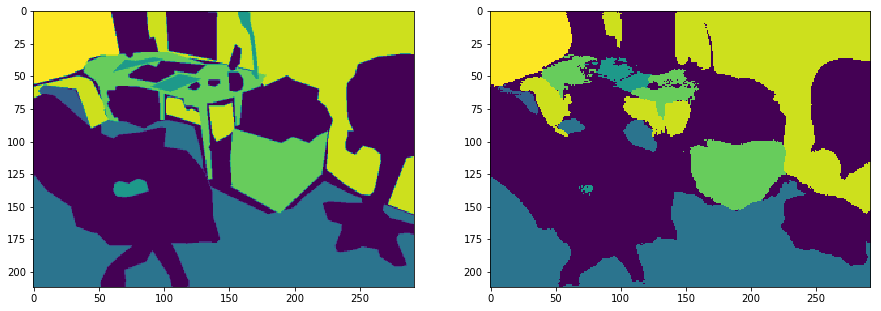

epoch :  5
loss :  0.307509


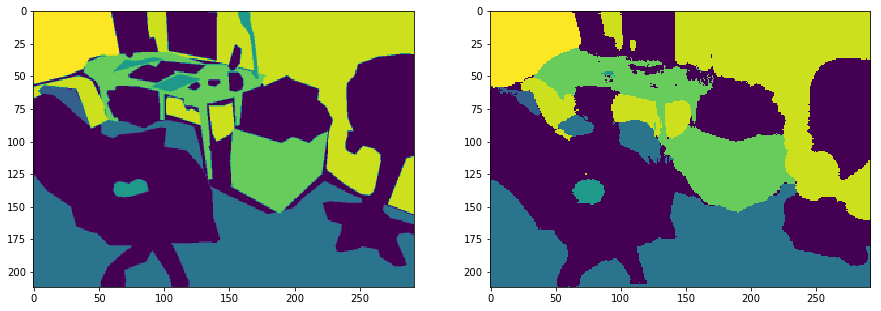

epoch :  6
loss :  0.308788


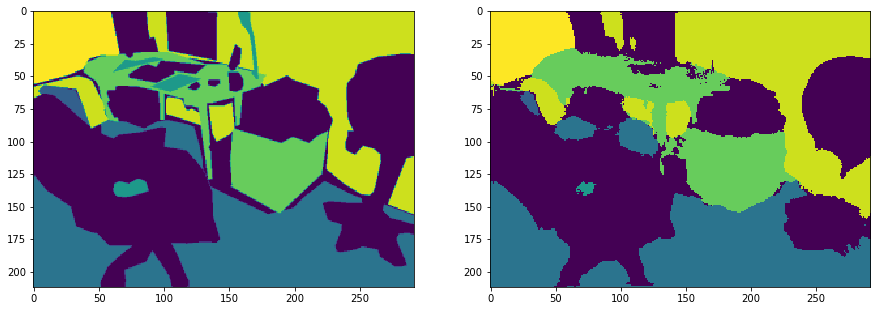

epoch :  7
loss :  0.32274


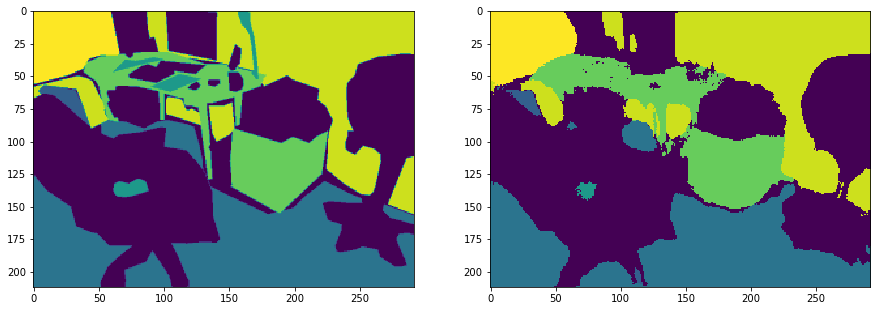

epoch :  8
loss :  0.332222


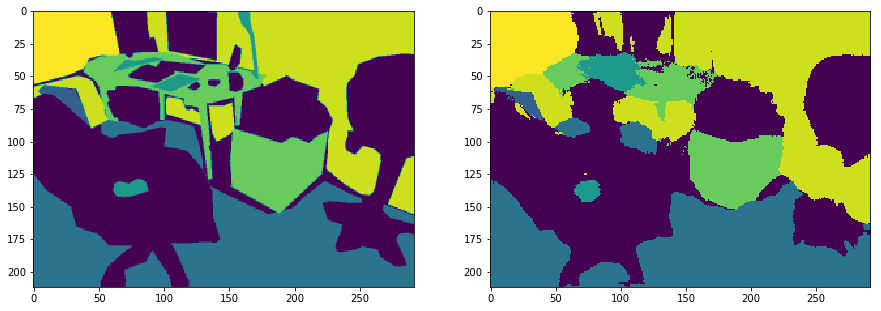

epoch :  9
loss :  0.319693


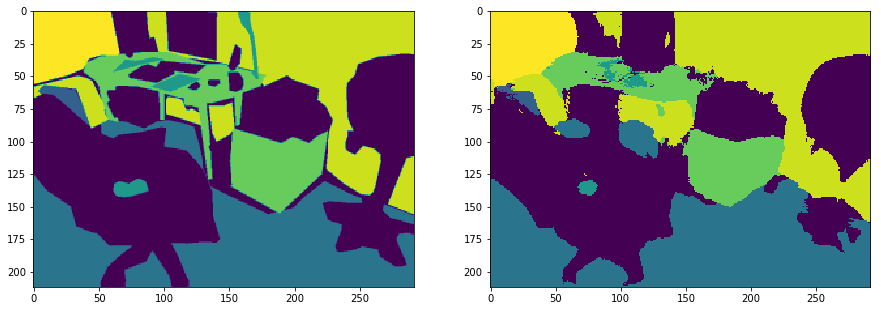

epoch :  10
loss :  0.349018


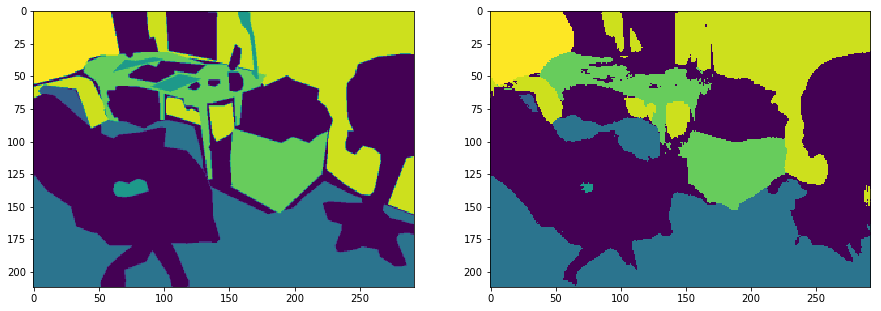

epoch :  11
loss :  0.327427


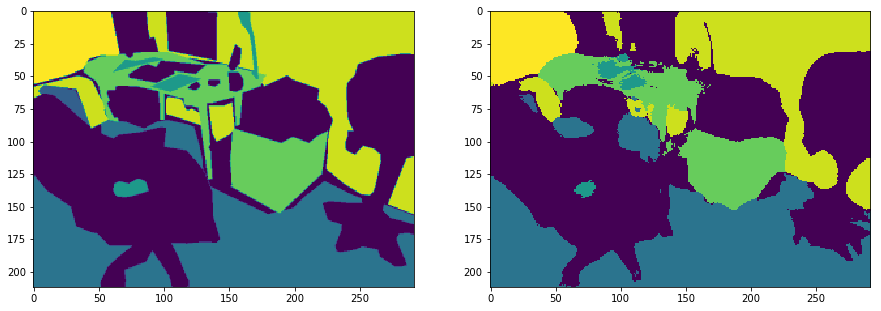

epoch :  12
loss :  0.328912


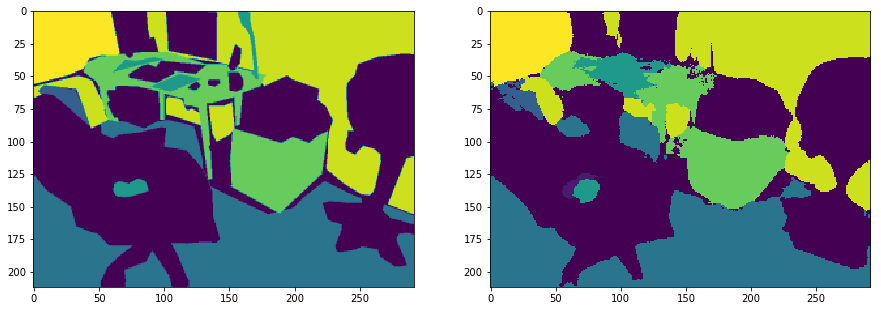

epoch :  13
loss :  0.308143


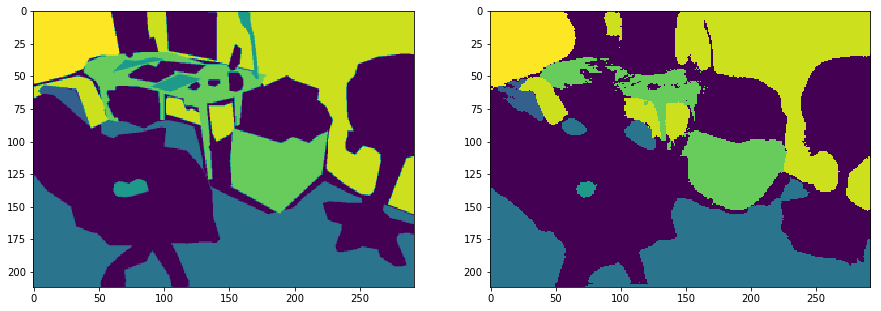

epoch :  14
loss :  0.386896


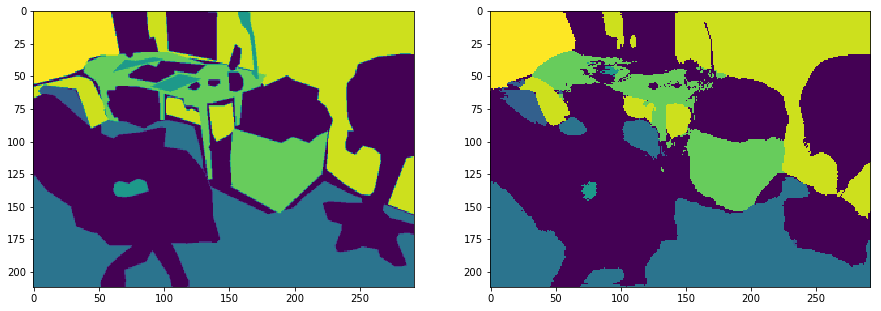

epoch :  15
loss :  0.299977


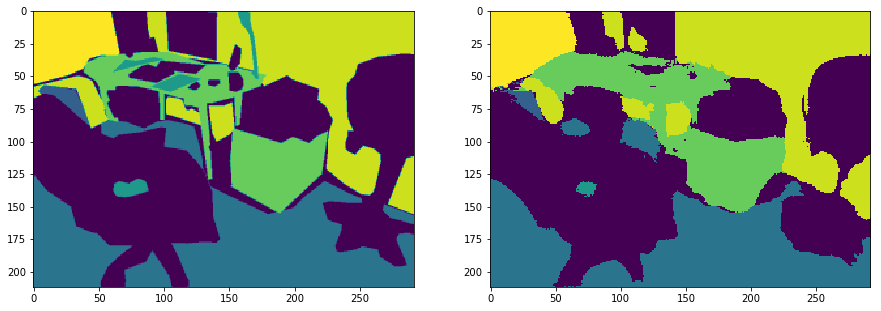

epoch :  16
loss :  0.324662


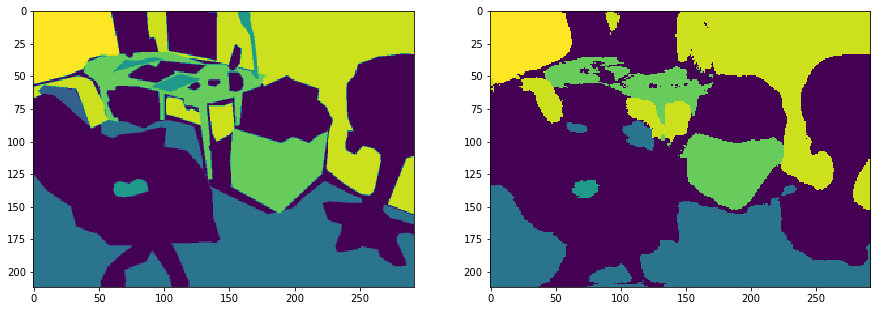

epoch :  17
loss :  0.298147


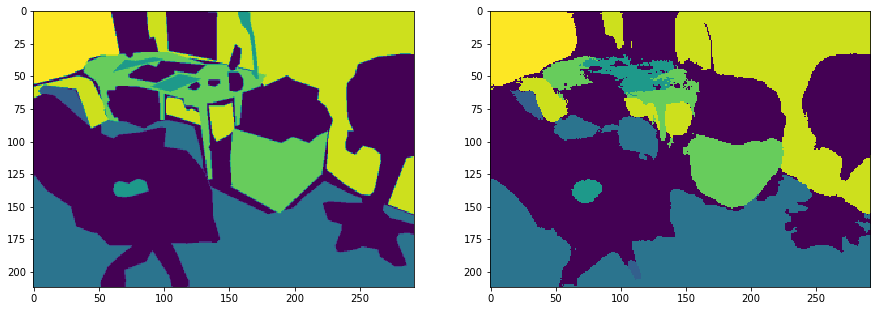

epoch :  18
loss :  0.31651


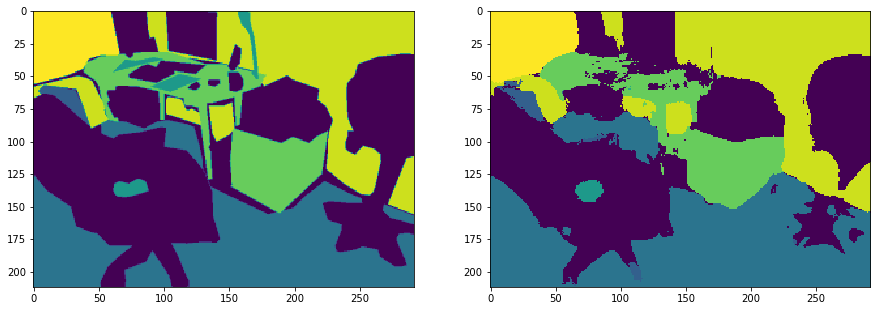

epoch :  19
loss :  0.296942


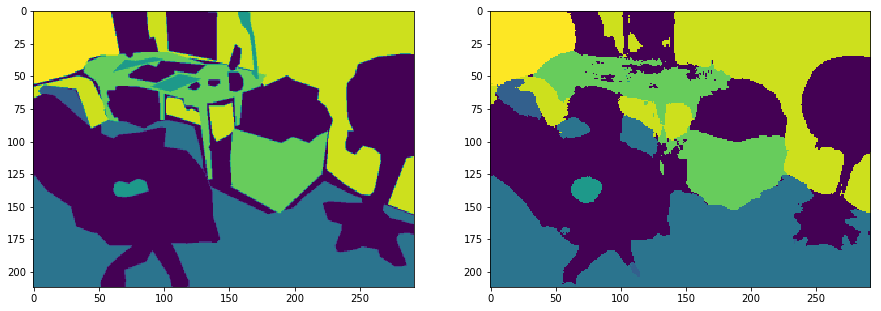

epoch :  20
loss :  0.315526


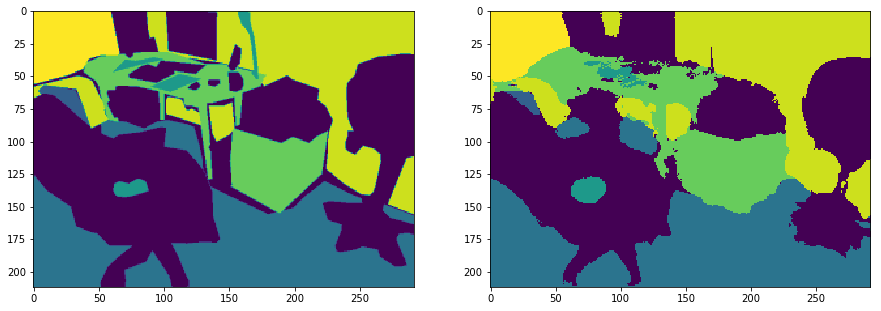

epoch :  21
loss :  0.322718


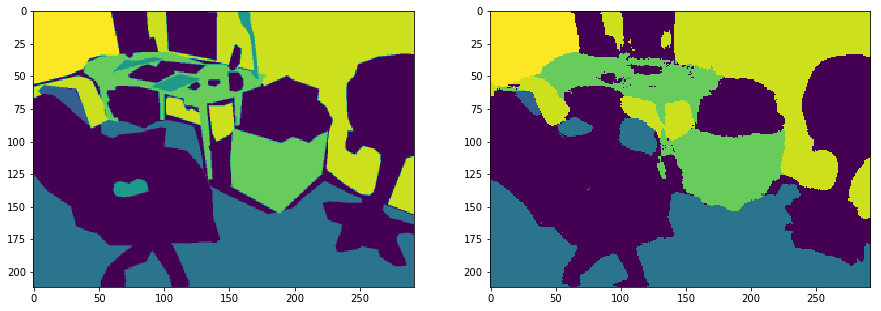

epoch :  22
loss :  0.305727


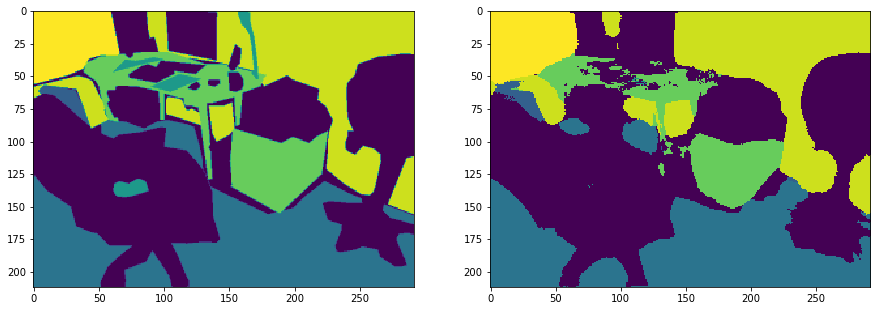

epoch :  23
loss :  0.326673


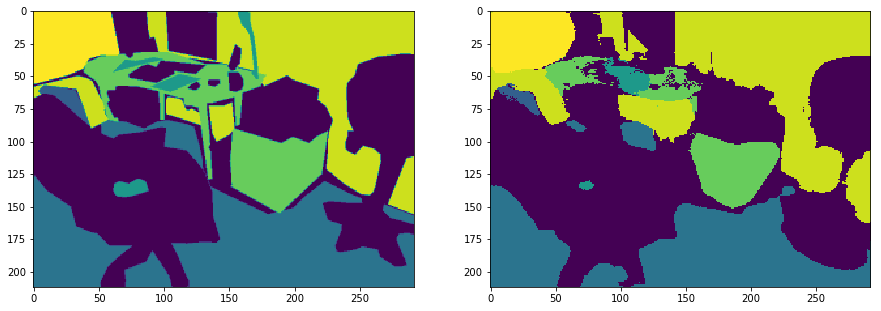

epoch :  24
loss :  0.32048


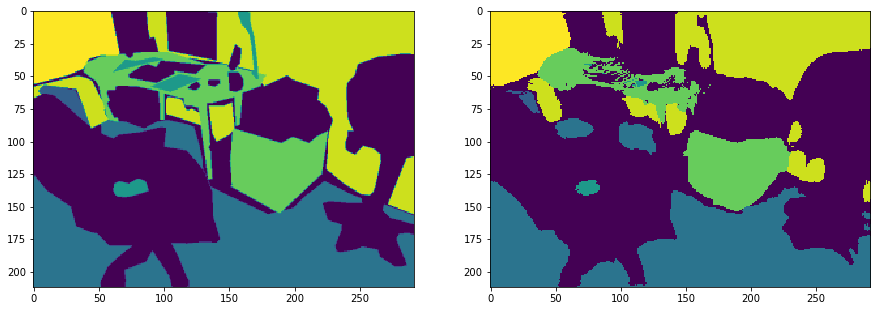

epoch :  25
loss :  0.298684


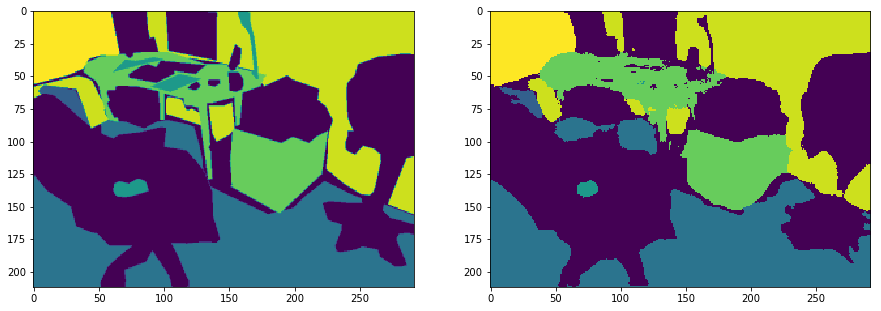

epoch :  26
loss :  0.321447


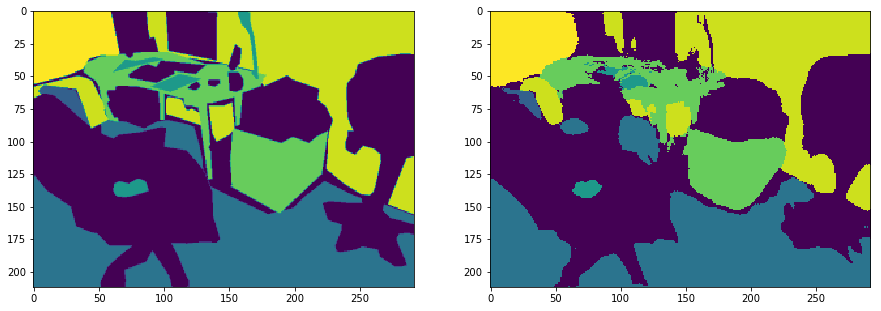

epoch :  27
loss :  0.301173


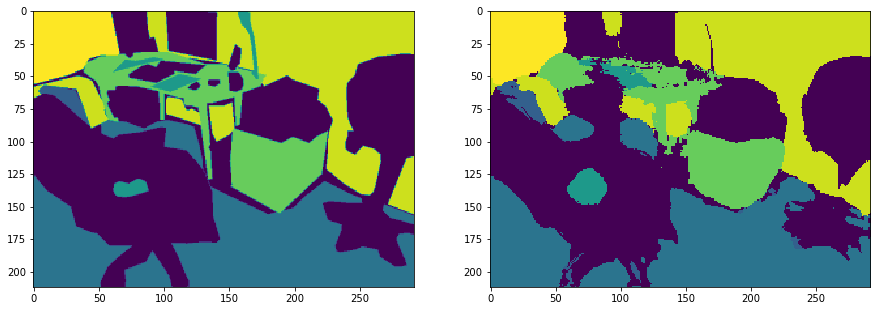

epoch :  28
loss :  0.267433


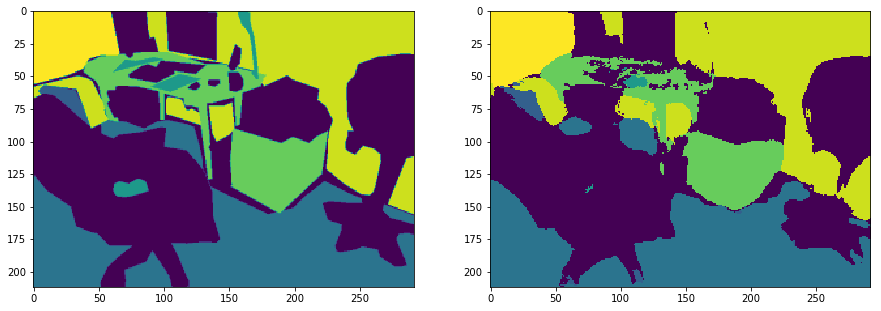

epoch :  29
loss :  0.317831


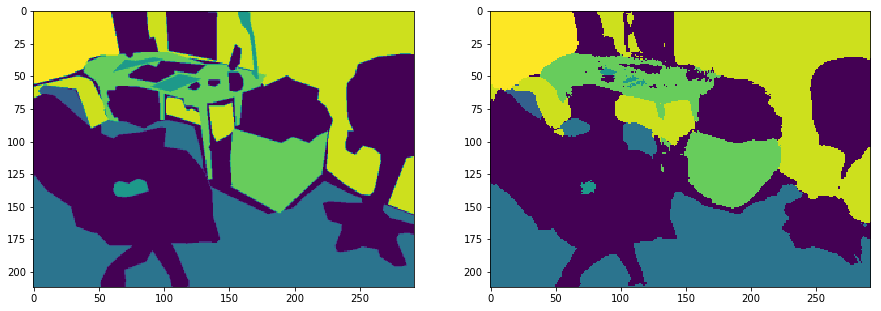

epoch :  30
loss :  0.287934


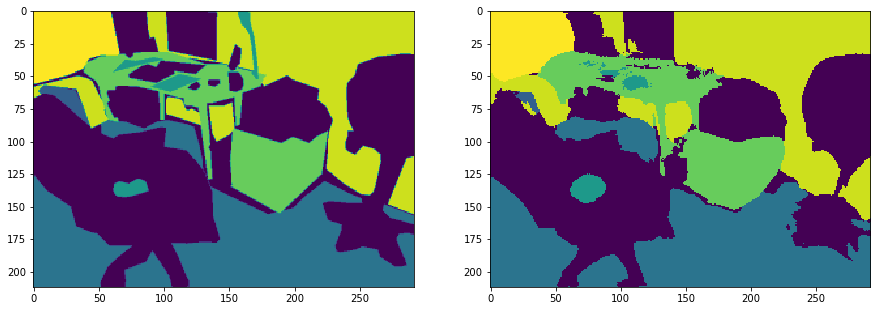

epoch :  31
loss :  0.286945


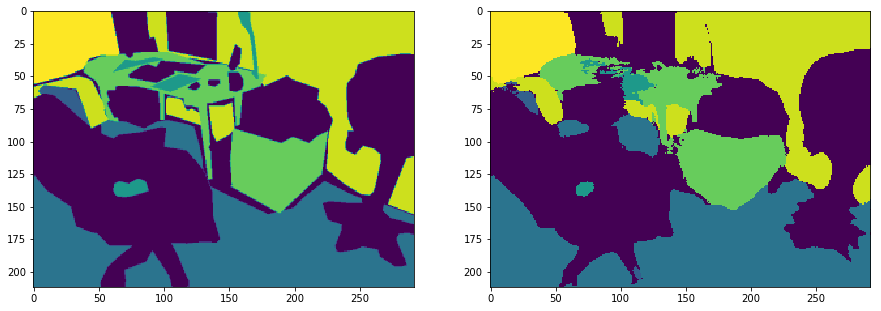

epoch :  32
loss :  0.277554


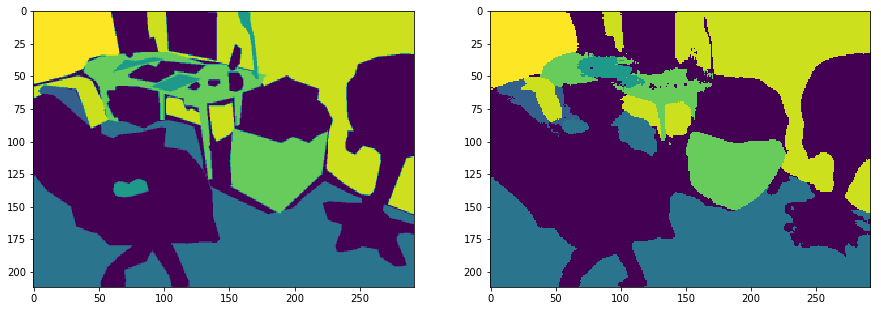

epoch :  33
loss :  0.278102


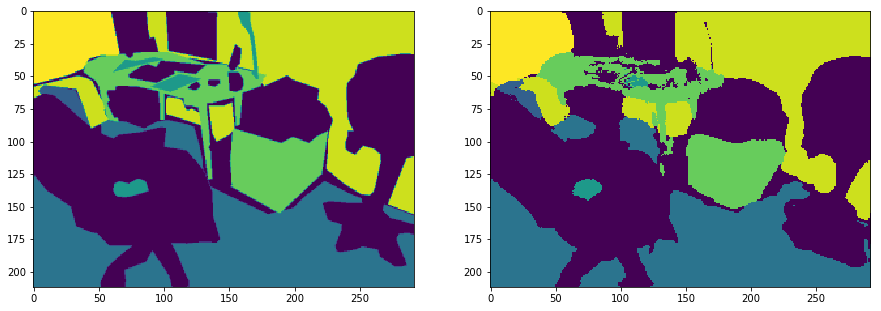

epoch :  34
loss :  0.272189


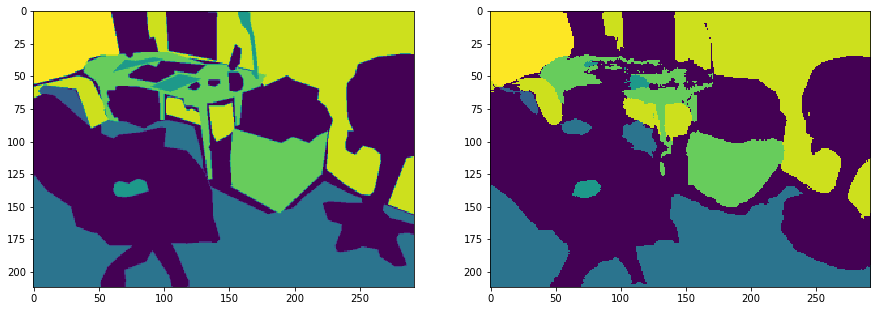

epoch :  35
loss :  0.268119


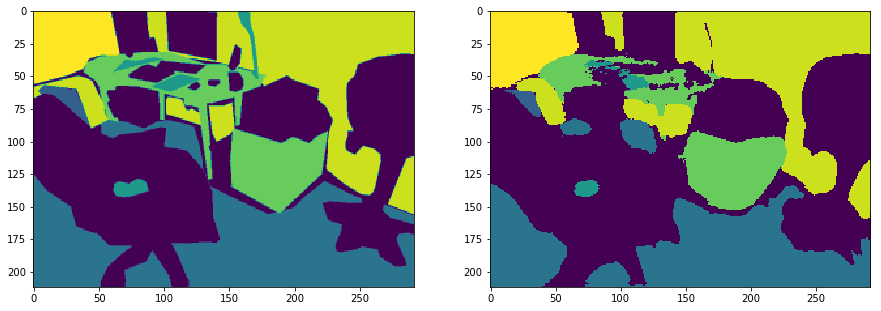

epoch :  36
loss :  0.286414


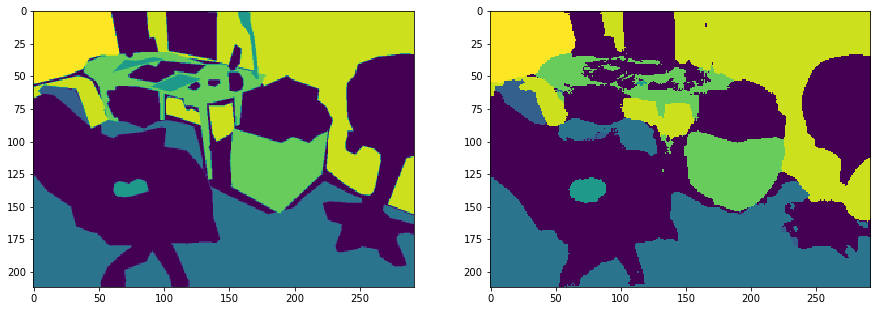

epoch :  37
loss :  0.272357


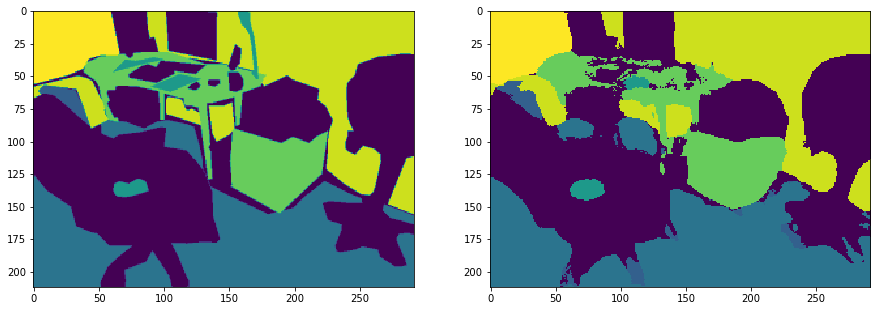

epoch :  38
loss :  0.271563


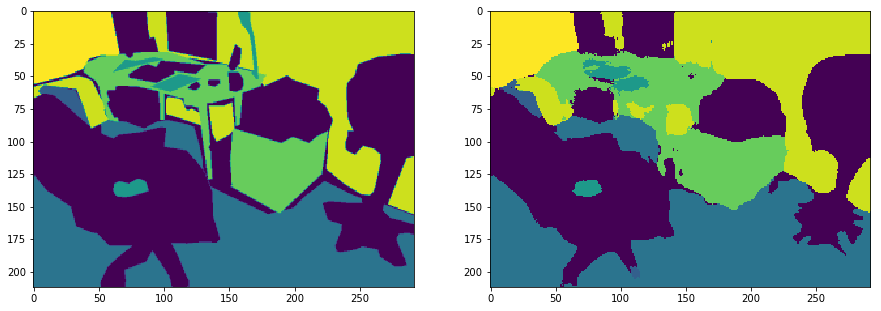

epoch :  39
loss :  0.275066


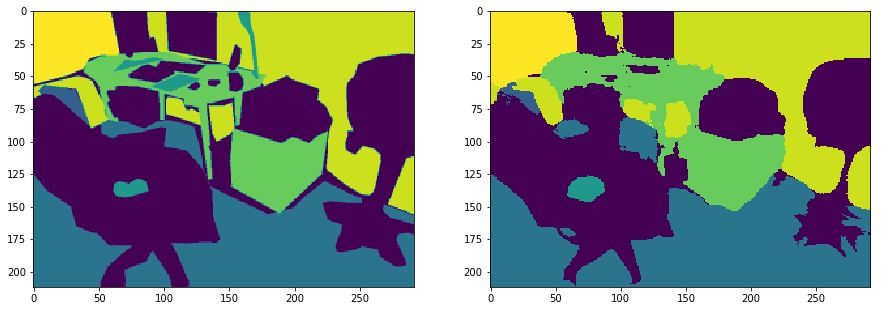

epoch :  40
loss :  0.320911


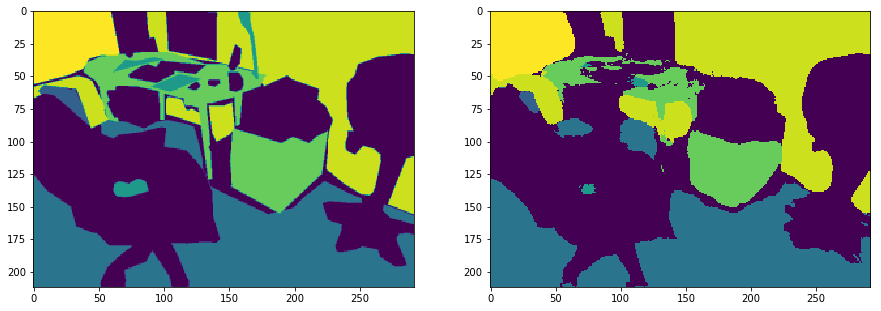

epoch :  41
loss :  0.289543


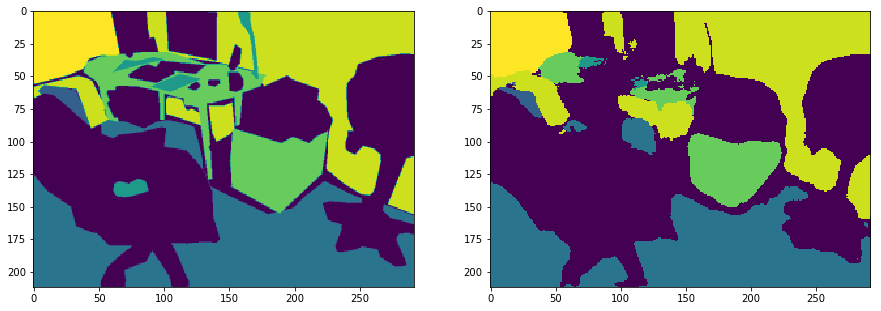

epoch :  42
loss :  0.281568


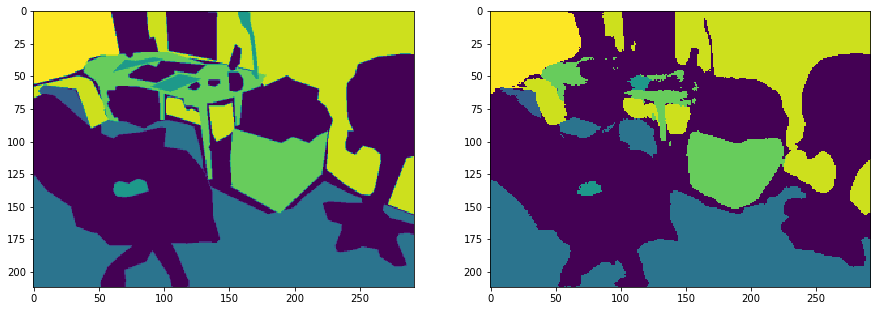

epoch :  43
loss :  0.268454


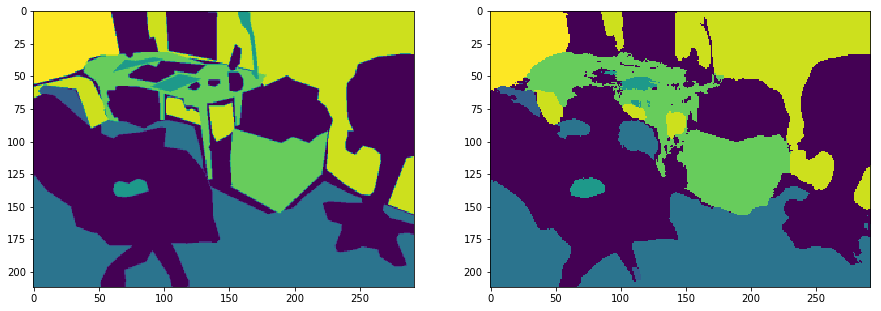

epoch :  44
loss :  0.269001


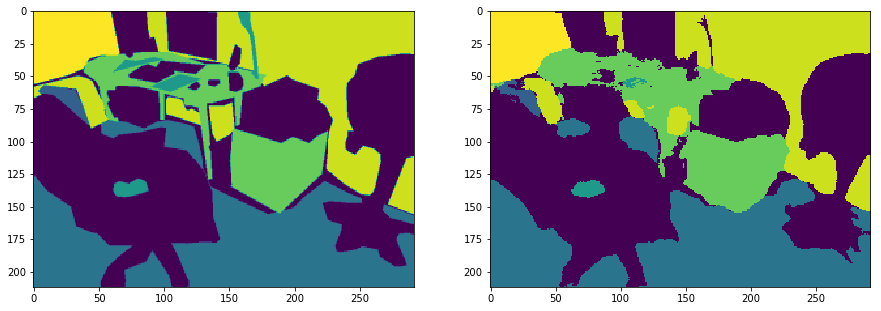

epoch :  45
loss :  0.285232


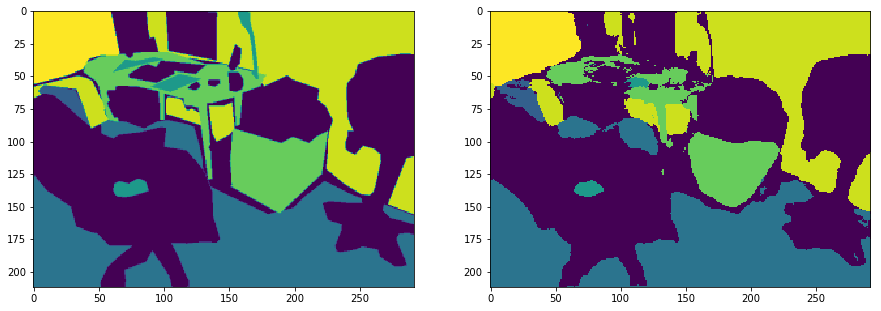

epoch :  46
loss :  0.2569


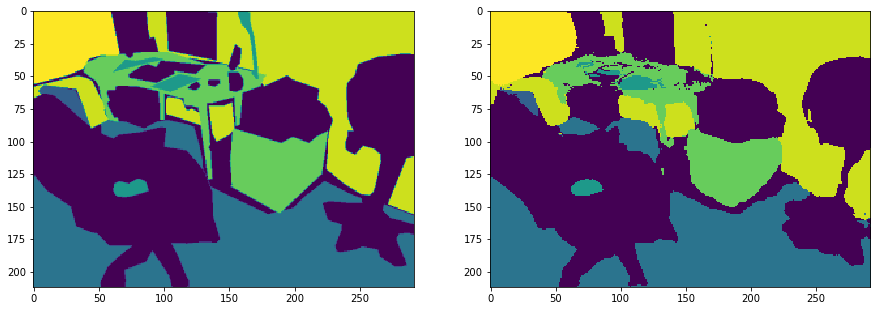

epoch :  47


KeyboardInterrupt: 

In [73]:
for epoch in range(training_epochs):
    a=0
    total_batch = int(math.ceil(len(train_image)/batch_size))
    print("epoch : ",epoch)
    for i in range(total_batch):
        if a+batch_size>len(train_image):
            batch_xs=train_image[a:]
            batch_ys=train_label[a:]
        else:
            batch_xs=train_image[a:a+batch_size]
            batch_ys=train_label[a:a+batch_size]
        feed_dict={x:batch_xs, y:batch_ys}
        y_img,img,l,_=sess.run([y_image,image,cost,optimizer], feed_dict=feed_dict)
        if l==tf.is_nan:
            break
        for i in range(len(batch_xs)):
            im=np.minimum(img[i,:,:]*5,255)
            cv2.imwrite('output1/output_img-'+str(a+i+1).zfill(6)+'.jpg',im)

        a=a+batch_size
    
    print("loss : ", l)
    plt.figure(figsize=(15,15))
    y_im=np.minimum(y_img[0,:,:]*5,255)
    im1=np.minimum(img[0,:,:]*5,255)
    plt.subplot(1,2,1); plt.imshow(y_im)       
    plt.subplot(1,2,2); plt.imshow(im1)
    plt.show()

In [ ]:
label_image=[im_resize(cv2.imread('data/train_labels/img13labels-'+str(i+1).zfill(6)+'.png')) for i in range(500)]#5285
output_image=[cv2.imread('output1/output_img-'+str(i+1).zfill(6)+'.jpg') for i in range(500)]#5285
# for i in range(500):
#     if i %50:
#         plt.figure(figsize=(15,15))
#         y_im=np.minimum(label_image[i][:,:,0]*5,255)
#         im1=np.minimum(output_image[i][:,:,0]*5,255)
#         plt.subplot(1,2,1); plt.imshow(y_im)       
#         plt.subplot(1,2,2); plt.imshow(im1)
#         plt.show()

In [1]:
cor_pre=tf.equal(tf.arg_max(output,1),tf.arg_max(y,1))
acc_=tf.reduce_mean(tf.cast(cor_pre,tf.float32))
feed_dict={x1:test_image, y:test_label, keep_conv:0.8, keep_hidden:0.5}
test_acc=sess.run(acc_,feed_dict=feed_dict)
print("accuracy : ", test_acc)

NameError: name 'tf' is not defined